In [1]:
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('Bank Marketing/bank-additional.csv', sep=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2.0,999,0.0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4.0,999,0.0,nonexistent,1.1,93.994,-36.4,4.855,5191,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1.0,999,0.0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3.0,999,0.0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1.0,999,0.0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


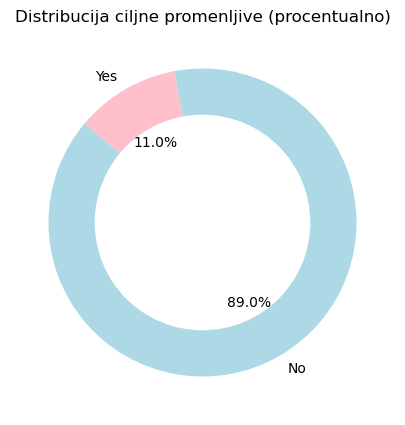

In [3]:
plt.figure(figsize=(8, 5))


counts = df['y'].value_counts(normalize=True) * 100  


plt.pie(counts, labels=['No', 'Yes'], autopct='%1.1f%%', startangle=140, colors=['lightblue', 'pink'])
plt.gca().add_artist(plt.Circle((0,0),0.70,fc='white'))


plt.title('Distribucija ciljne promenljive (procentualno)')


plt.show()

Imamo nebalansiran skup podataka


#  1. Analiza podataka 


Ovaj skup podataka sadrži informacije koje su prikupljene tokom direktnih marketinških kampanja (telefonski pozivi) jedne portugalske banke. Cilj kampanje je bio da se klijenti ubede da uplate depozit na određeni rok. Kroz ovu analizu, pokušaćemo da razumemo i istražimo različite aspekte podataka koji bi mogli da utiču na uspeh marketinških kampanja.

### 1.1 Tipovi podataka, kolone, nedostajuće vrednosti

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4116 non-null   float64
 11  campaign        4114 non-null   float64
 12  pdays           4119 non-null   int64  
 13  previous        4117 non-null   float64
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4116 non-null   float64
 16  cons.price.idx  4117 non-null   float64
 17  cons.conf.idx   4117 non-null   f

In [7]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [8]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          3
campaign          5
pdays             0
previous          2
poutcome          0
emp.var.rate      3
cons.price.idx    2
cons.conf.idx     2
euribor3m         2
nr.employed       1
y                 1
dtype: int64

###### Pregled kategorijskih podatka

In [9]:
for kolona in df.columns:
    if df[kolona].dtype=='object':
        vrednosti = df[kolona].unique()
        print(f"\nKolona {kolona} ima sledece vrednosti: {vrednosti}")


Kolona job ima sledece vrednosti: ['blue-collar' 'services' 'admin.' 'entrepreneur' 'self-employed'
 'technician' 'management' 'student' 'retired' 'housemaid' 'unemployed'
 'unknown']

Kolona marital ima sledece vrednosti: ['married' 'single' 'divorced' 'unknown']

Kolona education ima sledece vrednosti: ['basic.9y' 'high.school' 'university.degree' 'professional.course'
 'basic.6y' 'basic.4y' 'unknown' 'illiterate']

Kolona default ima sledece vrednosti: ['no' 'unknown' 'yes']

Kolona housing ima sledece vrednosti: ['yes' 'no' 'unknown']

Kolona loan ima sledece vrednosti: ['no' 'unknown' 'yes']

Kolona contact ima sledece vrednosti: ['cellular' 'telephone']

Kolona month ima sledece vrednosti: ['may' 'jun' 'nov' 'sep' 'jul' 'aug' 'mar' 'oct' 'apr' 'dec']

Kolona day_of_week ima sledece vrednosti: ['fri' 'wed' 'mon' 'thu' 'tue']

Kolona poutcome ima sledece vrednosti: ['nonexistent' 'failure' 'success']

Kolona nr.employed ima sledece vrednosti: ['5099.1' '5191' '5228.1' '5195.8' '49

###### Unknown vrednosti

In [10]:
unknown_values = df[df == 'unknown'].count()

unknown_values[unknown_values > 0] 
# Default ima mnogo nepoznatih vrednosti

job           39
marital       11
education    167
default      803
housing      105
loan         105
dtype: int64

###### Pregled statistika za numericke podatke

In [11]:
print(df.describe())

               age     duration     campaign        pdays     previous  \
count  4119.000000  4116.000000  4114.000000  4119.000000  4117.000000   
mean     40.113620   256.869048     2.534273   960.422190     0.190430   
std      10.313362   254.763913     2.566673   191.922786     0.541904   
min      18.000000     0.000000     1.000000     0.000000     0.000000   
25%      32.000000   103.000000     1.000000   999.000000     0.000000   
50%      38.000000   181.000000     2.000000   999.000000     0.000000   
75%      47.000000   317.250000     3.000000   999.000000     0.000000   
max      88.000000  3643.000000    35.000000   999.000000     6.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx    euribor3m  
count   4116.000000     4117.000000    4117.000000  4117.000000  
mean       0.084694       93.579540     -40.486358     4.858993  
std        1.563361        0.579442       4.639840    79.432456  
min       -3.400000       92.201000     -50.800000     0.635000  
25%

##### Pdays

(array([ 160.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        3959.]),
 array([  0. ,  99.9, 199.8, 299.7, 399.6, 499.5, 599.4, 699.3, 799.2,
        899.1, 999. ]),
 <BarContainer object of 10 artists>)

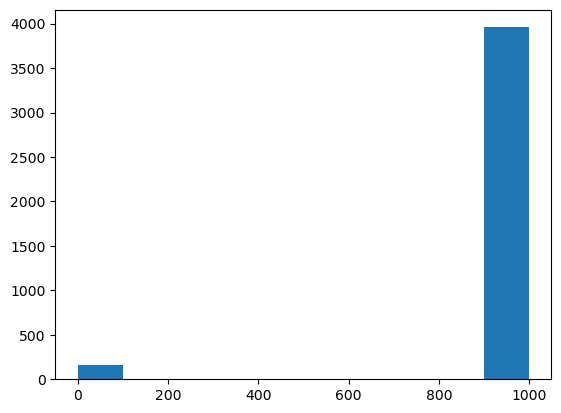

In [12]:
plt.hist(df['pdays'])

Vidimo da se atribut pdays ne ponasa ocekivano, istrazivanjem saznajemo da broj 999 oznacava da osoba nije kontaktirana u proslosti, sto cemo imati na umu prilikom pretprocesiranja

#### Previous

(array([3.521e+03, 4.750e+02, 0.000e+00, 7.800e+01, 0.000e+00, 2.500e+01,
        1.400e+01, 0.000e+00, 2.000e+00, 2.000e+00]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <BarContainer object of 10 artists>)

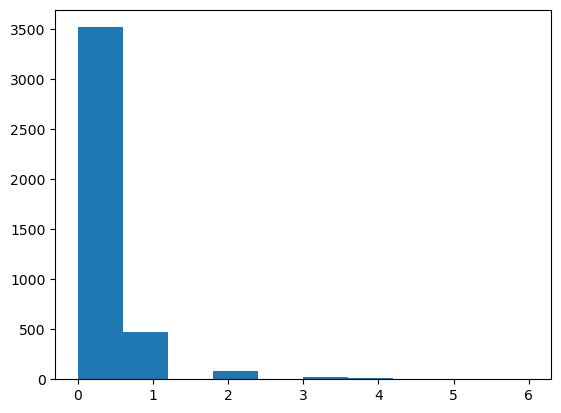

In [13]:
plt.hist(df['previous'])

##### Campaign

(array([4.280e+02, 8.450e+02, 2.300e+01, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 3.020e+02, 7.400e+01, 2.289e+03]),
 array([0.635, 1.076, 1.517, 1.958, 2.399, 2.84 , 3.281, 3.722, 4.163,
        4.604, 5.045]),
 <BarContainer object of 10 artists>)

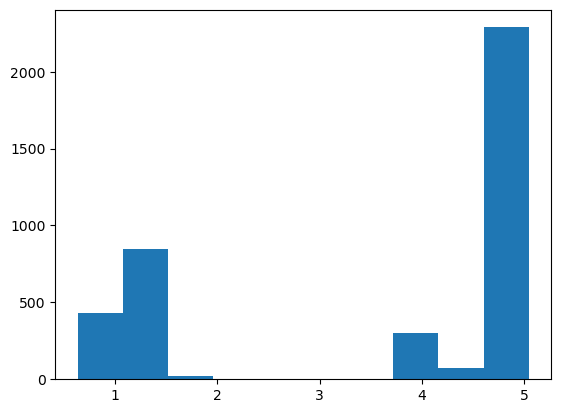

In [92]:
plt.hist(df['euribor3m'])

##### Duration

<Axes: xlabel='duration'>

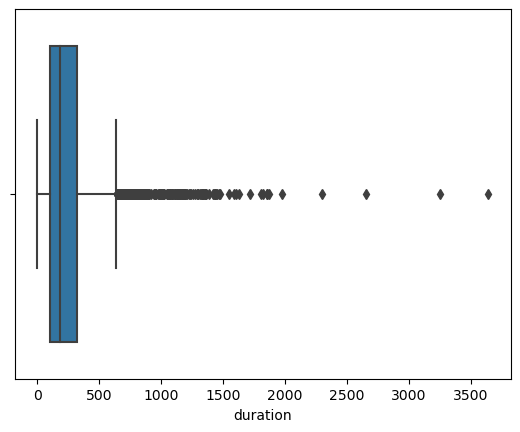

In [15]:
sns.boxplot(x = 'duration', data = df)

Vidimo da postoji veliki broj autlajera, kao i da je raspon vrednosti veliki, sto moze da utice negativno na model. Trajanje poziva je izrazeno u sekundama, te cemo prebaciti u minute

#### cons.price.idx

(array([ 143.,   71.,  698.,  587.,  551.,    0., 1466.,  126.,  431.,
          44.]),
 array([92.201 , 92.4576, 92.7142, 92.9708, 93.2274, 93.484 , 93.7406,
        93.9972, 94.2538, 94.5104, 94.767 ]),
 <BarContainer object of 10 artists>)

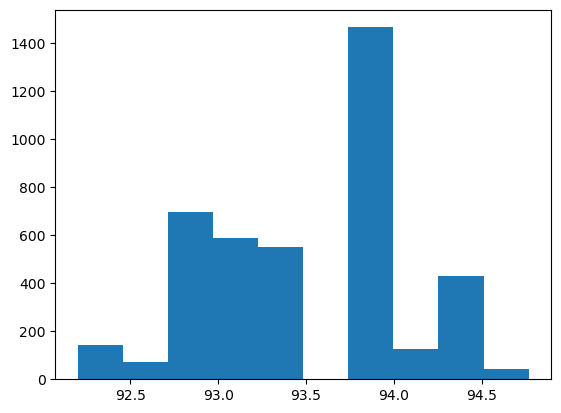

In [16]:
plt.hist(df['cons.price.idx'])

In [17]:
df['cons.price.idx'].unique()

array([92.893, 93.994, 94.465, 93.2  , 94.199, 93.918, 93.444, 93.369,
       92.843, 92.963, 94.601, 94.027, 92.379, 92.431, 93.749, 93.075,
       94.055, 92.469, 94.767, 92.201, 92.649, 94.215,    nan, 93.876,
       93.798, 92.713, 92.756])

### nr.employed

In [19]:
df['nr.employed'].unique()


array(['5099.1', '5191', '5228.1', '5195.8', '4963.6', '5008.7', '5076.2',
       '4991.6', '5017.5', nan, '5023.5', 'no', '5176.3'], dtype=object)

#### cons.conf.idx

(array([8.660e+02, 1.565e+03, 1.434e+03, 1.830e+02, 6.800e+01, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([-50.8   , -45.5934, -40.3868, -35.1802, -29.9736, -24.767 ,
        -19.5604, -14.3538,  -9.1472,  -3.9406,   1.266 ]),
 <BarContainer object of 10 artists>)

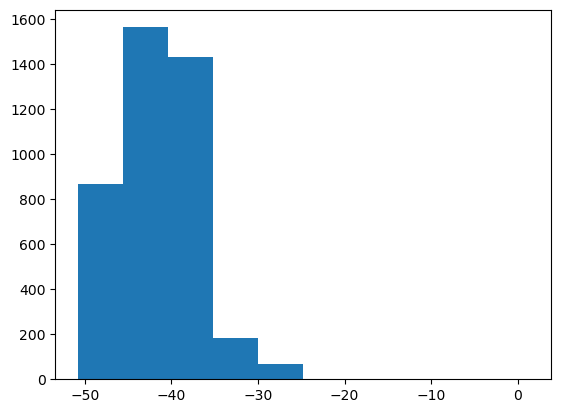

In [20]:
df['cons.conf.idx'].unique()
plt.hist(df['cons.conf.idx'])

### euribor3m

In [21]:
df['euribor3m'].unique()

array([1.3130e+00, 4.8550e+00, 4.9620e+00, 4.9590e+00, 4.1910e+00,
       8.8400e-01, 8.7900e-01, 4.1530e+00, 4.9580e+00, 4.9680e+00,
       4.8590e+00, 4.9630e+00, 4.9570e+00, 4.9650e+00, 4.9610e+00,
       6.3900e-01, 4.9670e+00, 4.8640e+00, 4.8560e+00, 1.2990e+00,
       4.8600e+00, 1.6870e+00, 4.8650e+00, 1.2680e+00, 4.1200e+00,
       1.3340e+00, 9.7700e-01, 1.3440e+00, 8.9900e-01, 1.3270e+00,
       4.5920e+00, 4.9700e+00, 1.2600e+00, 4.9660e+00, 7.7000e-01,
       4.8660e+00, 4.9640e+00, 4.8570e+00, 8.8600e-01, 7.3900e-01,
       6.5400e-01, 1.4050e+00, 1.2810e+00, 4.9600e+00, 7.5400e-01,
       1.2910e+00, 1.3650e+00, 4.0760e+00, 1.2660e+00, 1.4100e+00,
       1.2500e+00, 4.8580e+00, 7.0200e-01, 1.0290e+00, 1.0850e+00,
       1.3920e+00, 1.2620e+00, 1.0500e+00, 8.5100e-01, 7.1600e-01,
       8.7700e-01, 8.3500e-01, 1.0480e+00, 9.0400e-01, 1.0280e+00,
       6.3700e-01, 1.2440e+00, 1.3540e+00, 4.0210e+00, 1.4530e+00,
       7.1500e-01, 1.7780e+00, 7.7300e-01, 1.0350e+00, 9.0000e

##### Godine

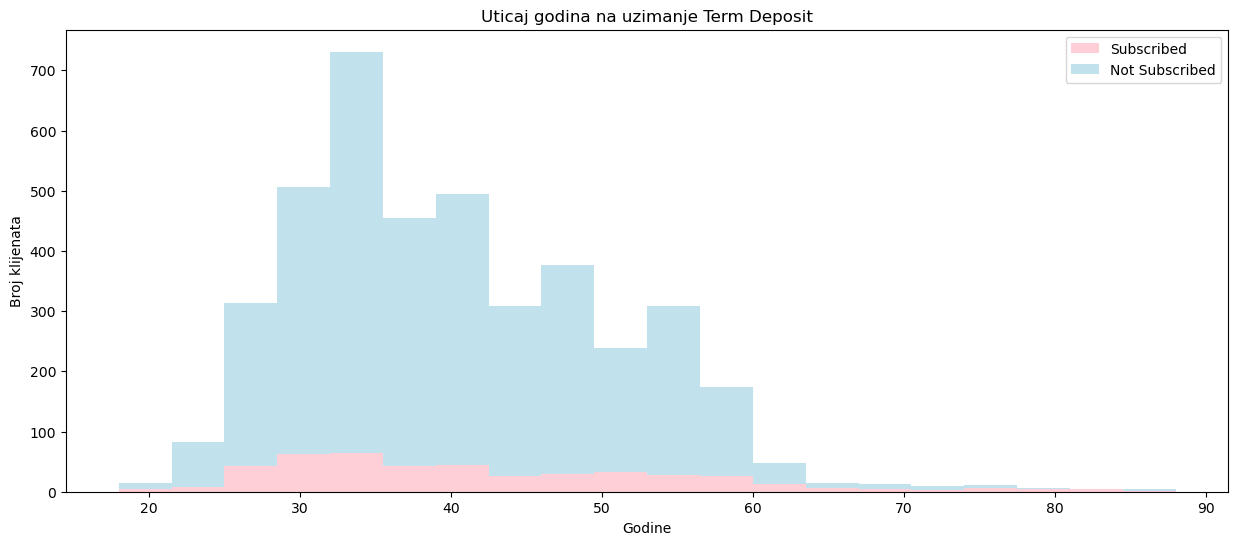

In [22]:
plt.figure(figsize=(15, 6))
plt.hist([df[df['y']=='yes']['age'], df[df['y']=='no']['age']], bins=20, alpha=0.75, label=['Subscribed', 'Not Subscribed'],
         color=['pink', 'lightblue'],stacked=True)
plt.title('Uticaj godina na uzimanje Term Deposit')
plt.xlabel('Godine')
plt.ylabel('Broj klijenata')
plt.legend()
plt.show()

Procenjujemo da godine nemaju znacajnu ulogu za predvidjanje i da je potrebno skalirati opseg vrednosti

## 1.2 Graficki prikaz kategorickih podataka i njihove povezanosti sa izlaznim atributom


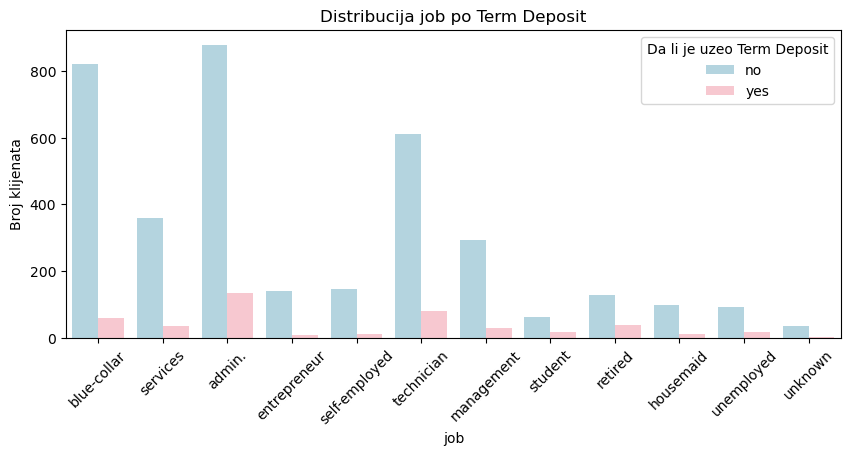

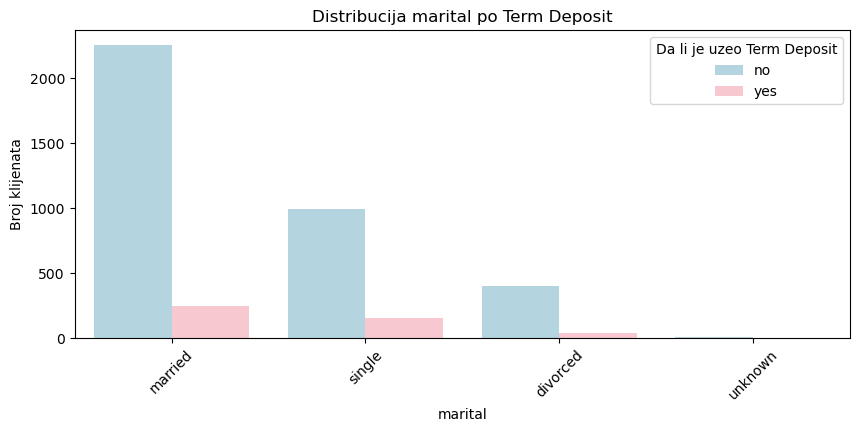

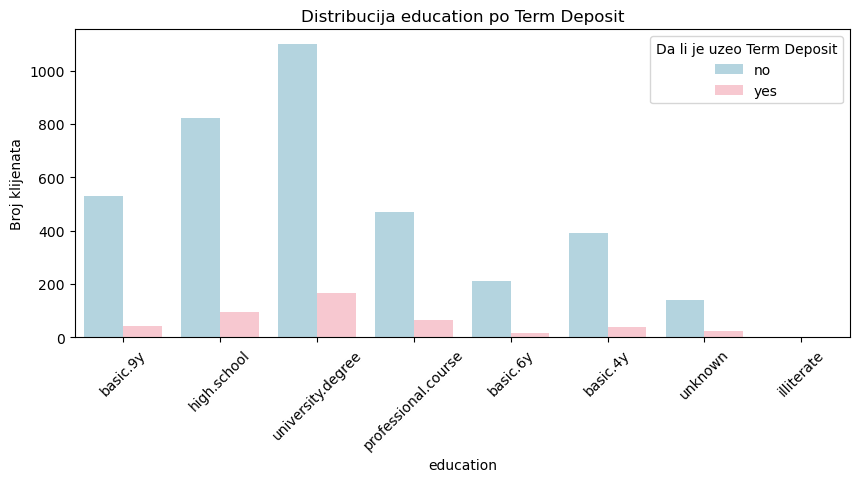

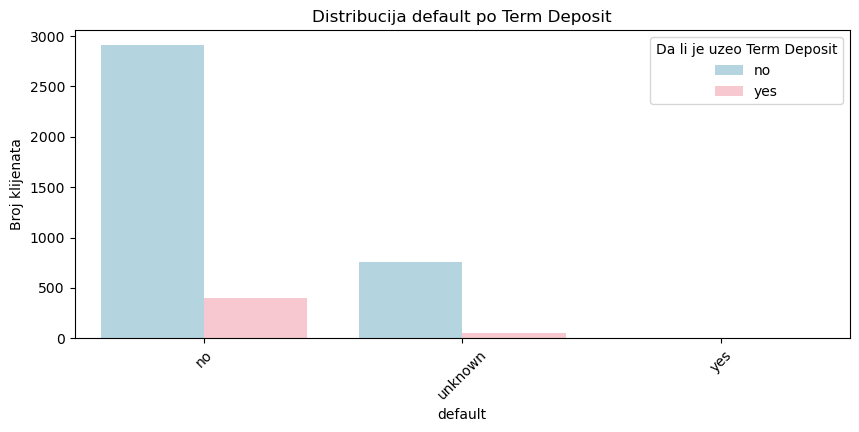

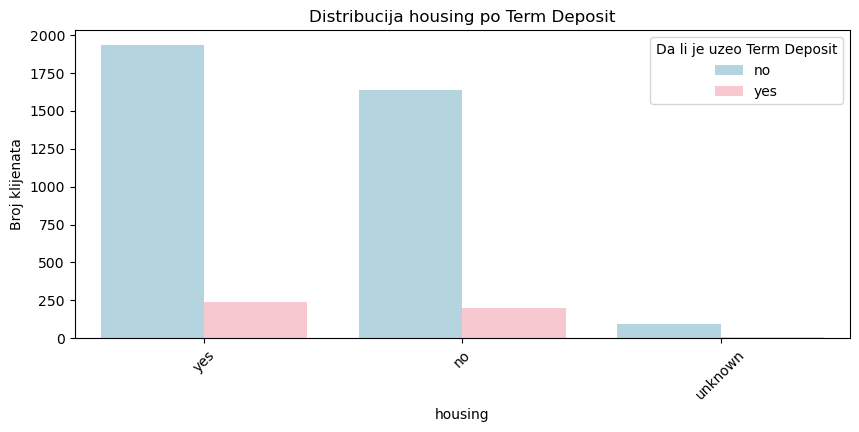

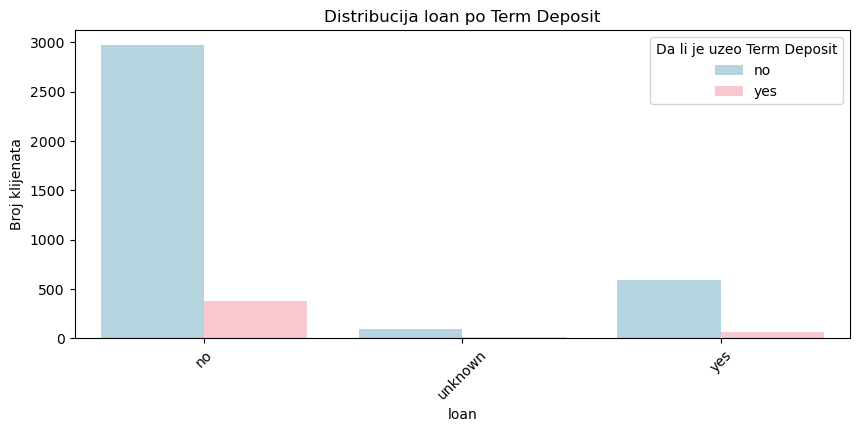

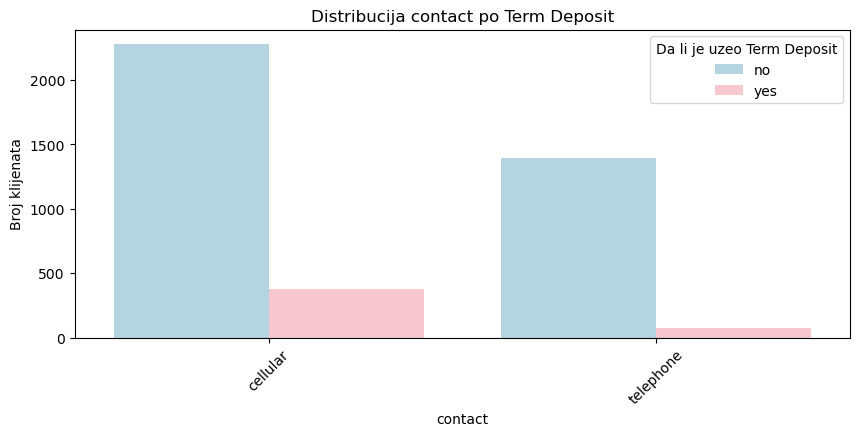

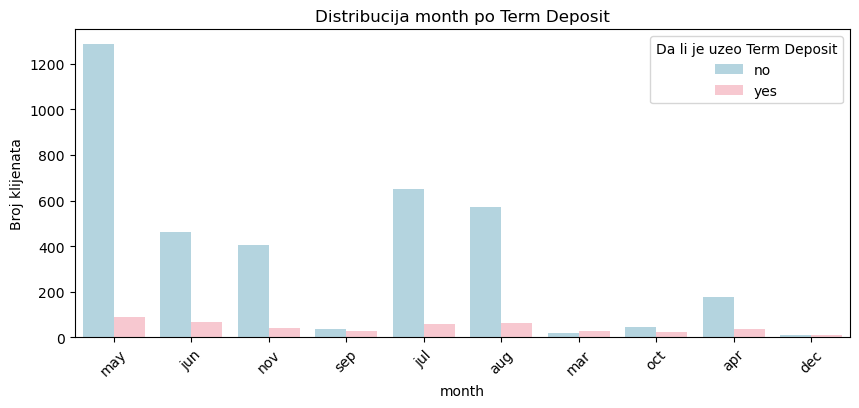

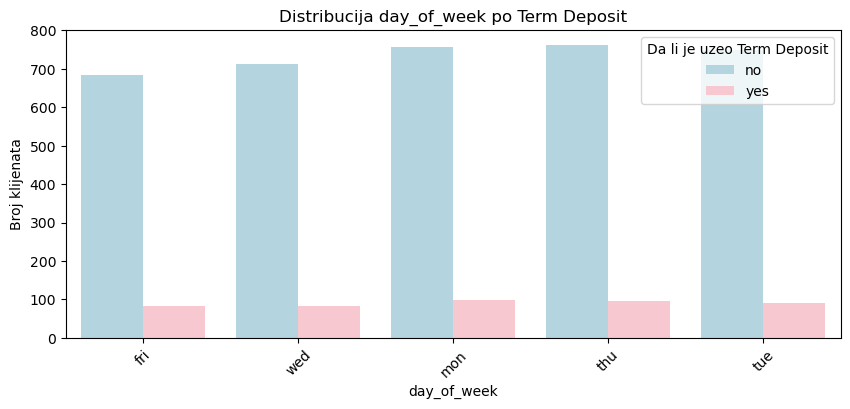

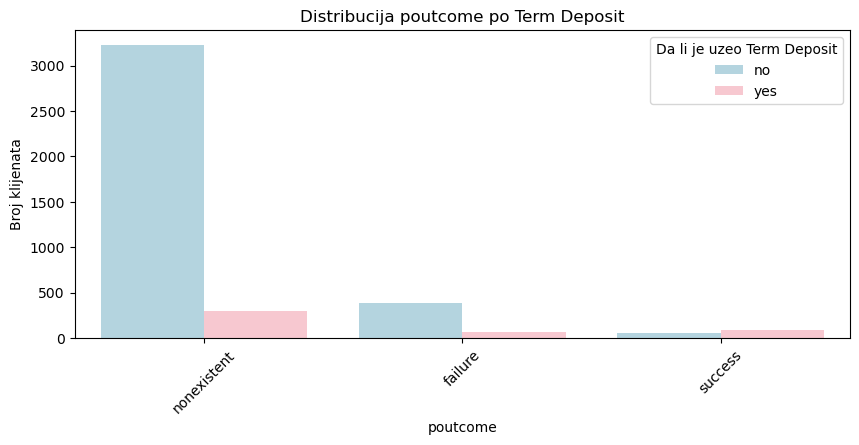

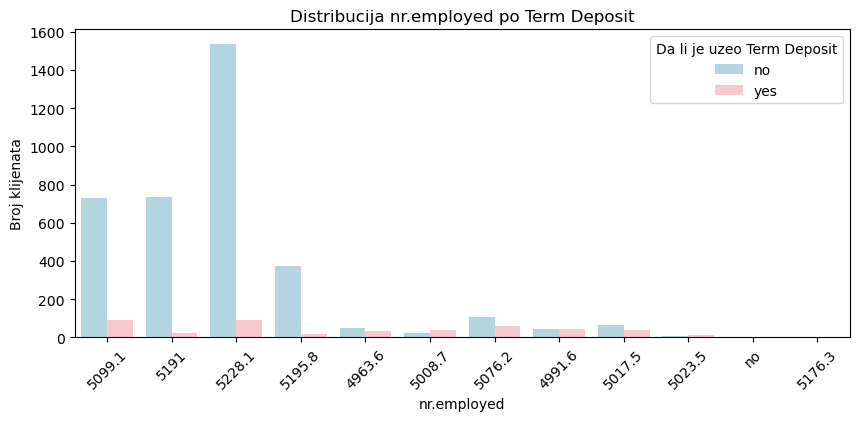

In [23]:
for column in df.select_dtypes(include=['object']).columns:
    if column != 'y':
        plt.figure(figsize=(10, 4))
        sns.countplot(data=df, x=column, hue='y',palette=['lightblue', 'pink']) 
        plt.title('Distribucija ' + column + ' po ' + 'Term Deposit')
        plt.ylabel('Broj klijenata')
        plt.xticks(rotation=45)
        plt.legend(title='Da li je uzeo Term Deposit', loc='upper right')
        plt.show()

-Kategorije education i job imaju veliki broj vrednosti sto moze da ima negativni efekat na predvidjanje, te bi bilo pozeljno grupisati ih u manji broj

-Default ima veliki broj nepozatih vrednosti i veoma malo vrednosti 'yes', te nam nece biti korisno za predvidjanje

-Day of week i Month nemaju informativnog znacaja

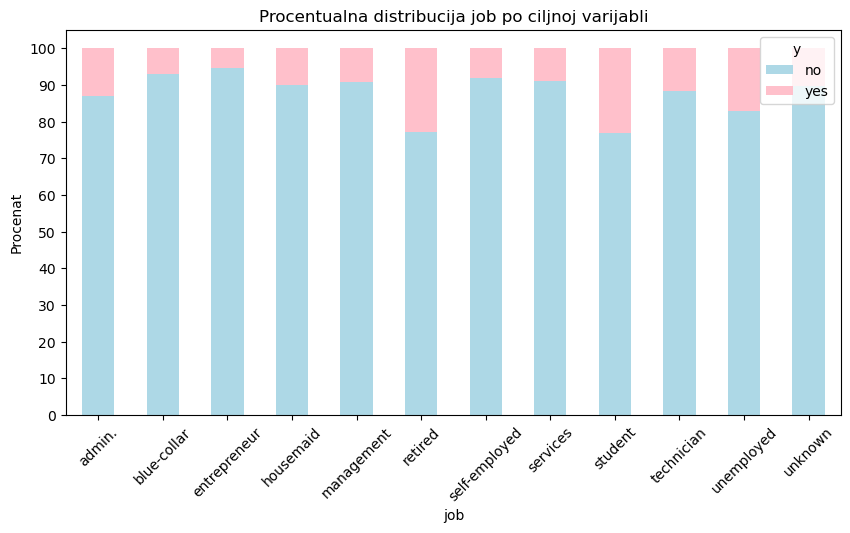

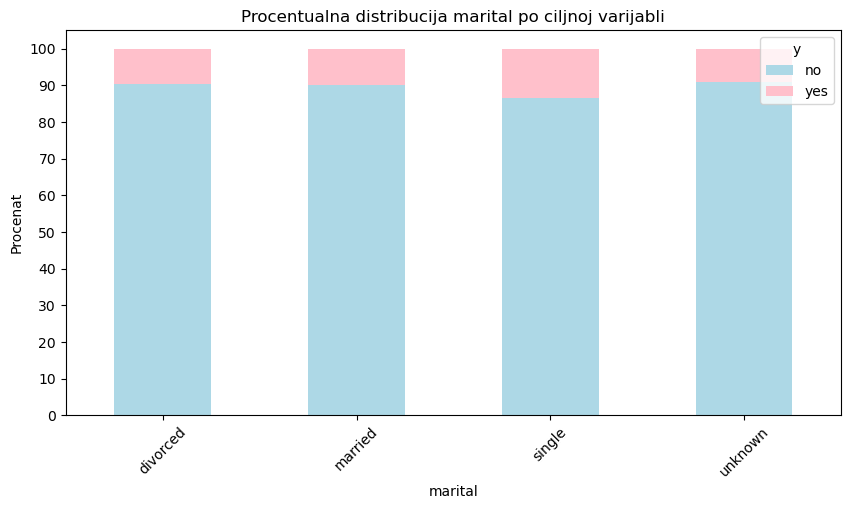

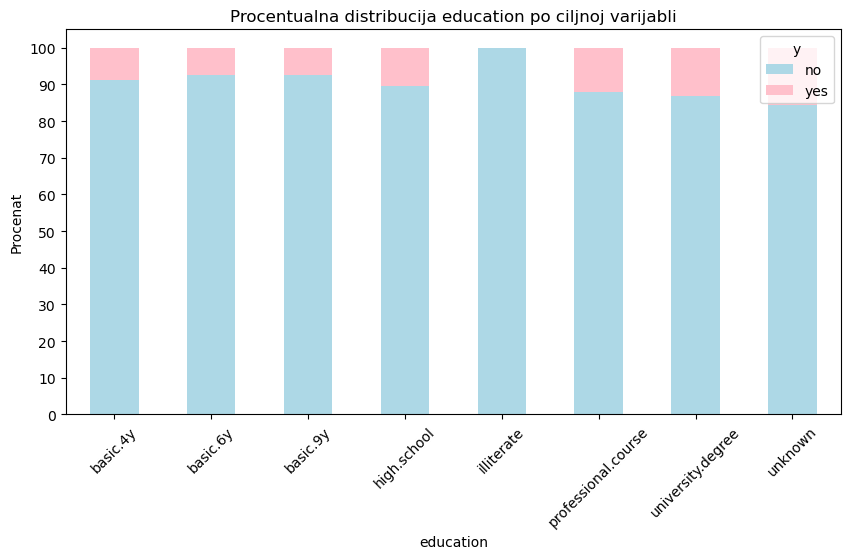

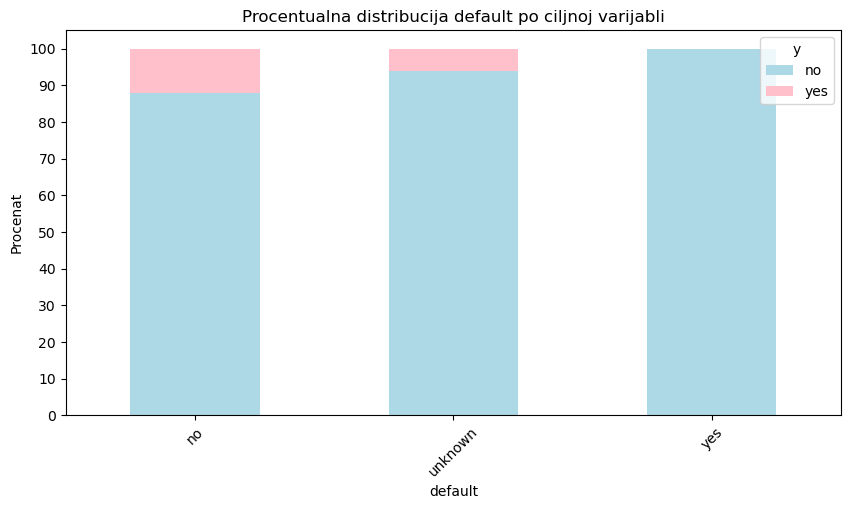

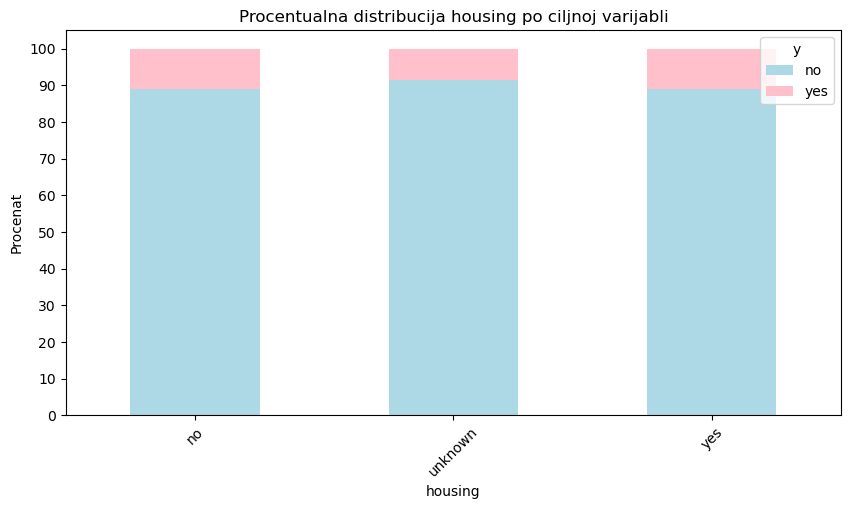

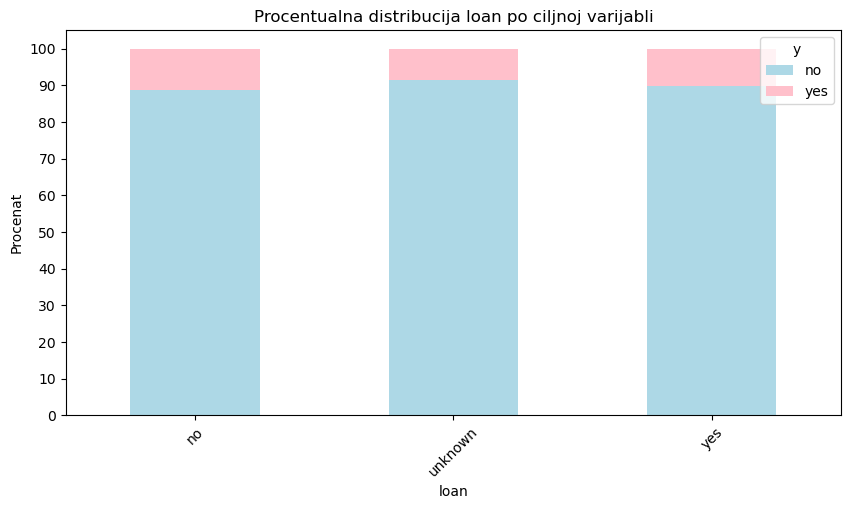

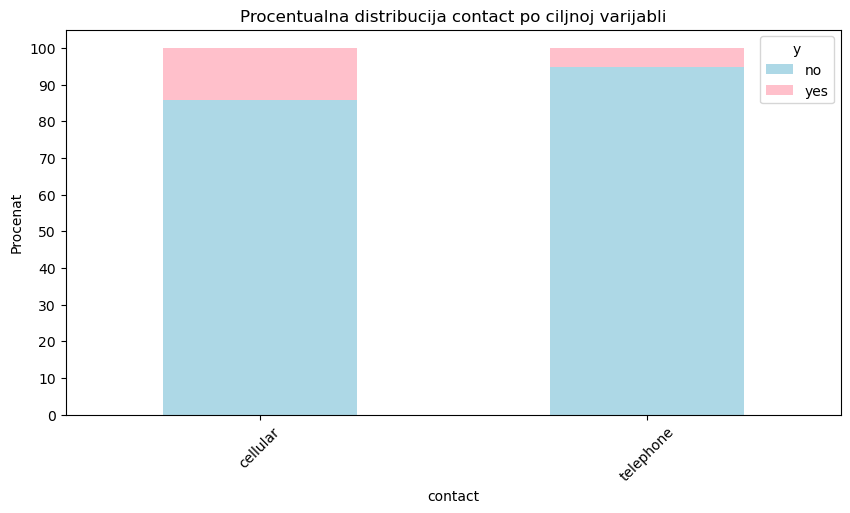

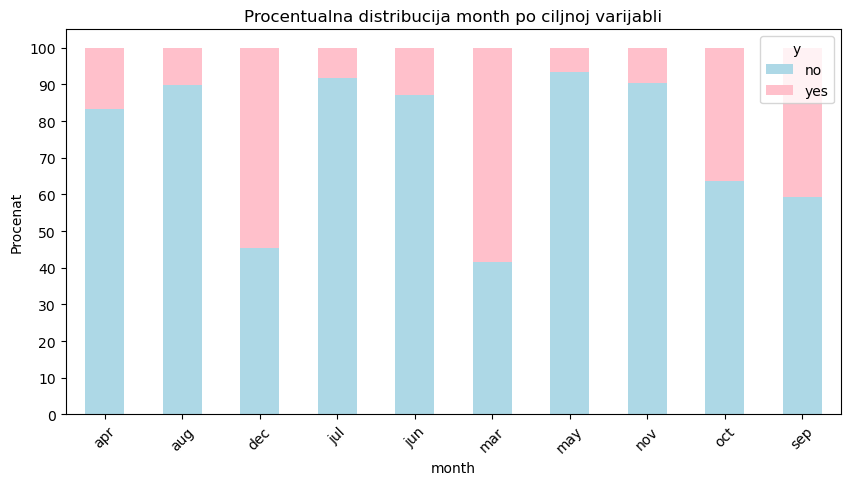

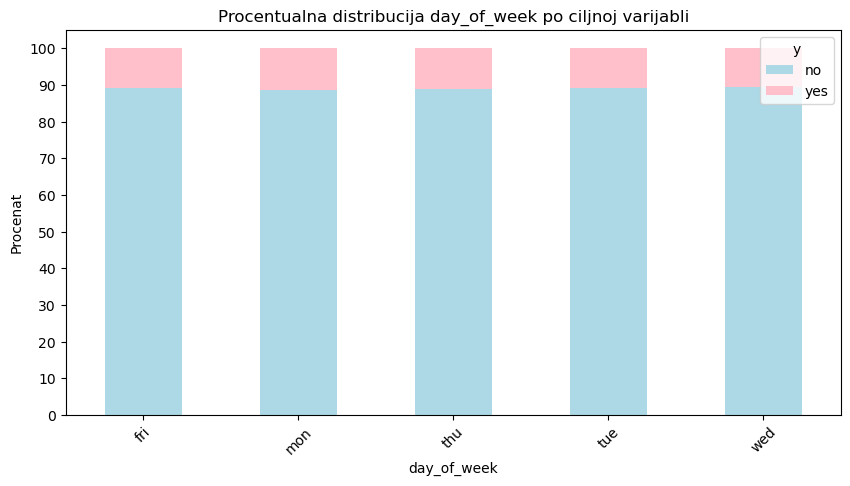

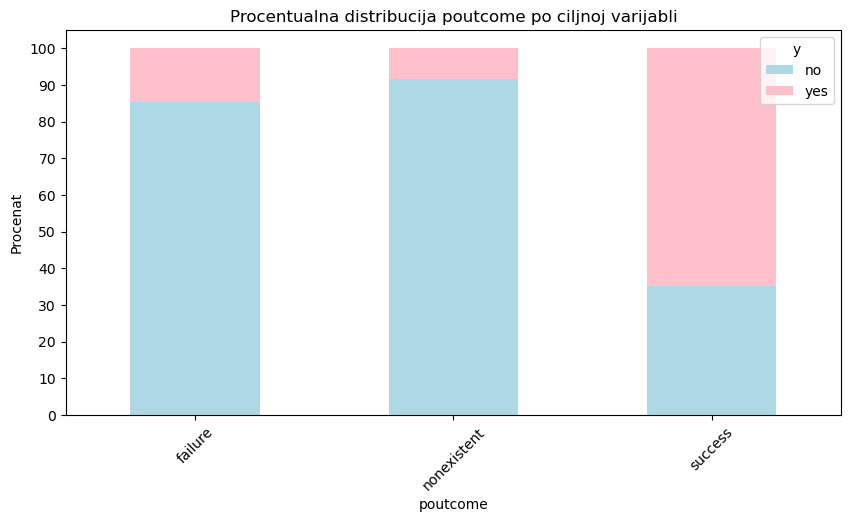

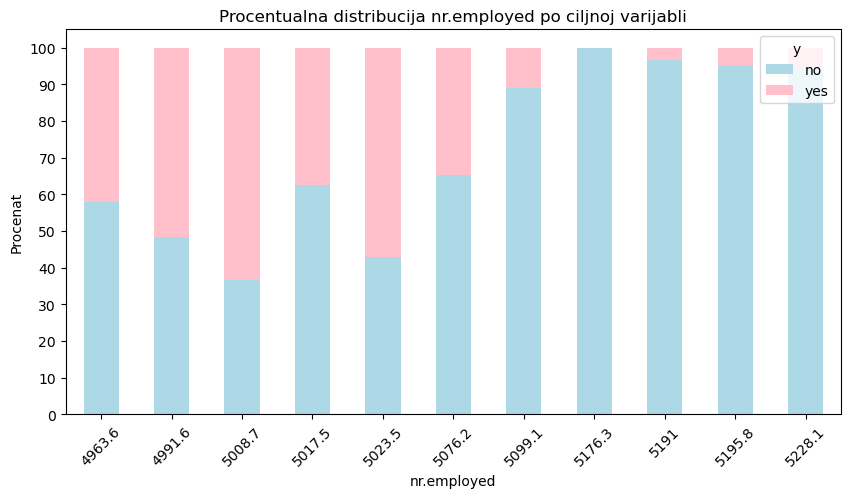

In [24]:
for column in df.select_dtypes(include=['object']).columns:
     if column != 'y':
        frequency_table = pd.crosstab(index=df[column], columns=df['y'], normalize='index') * 100
        frequency_table.plot(kind='bar', stacked=True, figsize=(10, 5),color=['lightblue', 'pink'])  
        plt.title('Procentualna distribucija ' + column + ' po ciljnoj varijabli')
        plt.xlabel(column)
        plt.ylabel('Procenat')
        plt.legend(title='y', loc='upper right')
        plt.xticks(rotation=45)
        plt.yticks(np.arange(0, 101, 10))
        plt.show()

U ovoj seriji grafikona trazimo grupe ljudi koje imaju manju ili vecu verovatnocu da uzmu Term Deposit. Ocekivani odnos vrednosti 'yes' i 'no' je oko 10:90

- Penzioneri, studenti i nezaposleni pokazuju vecu sklonost ka uzimanju depozita - oko 20%
- Osobe koje su poziv dobile na cellular cesce prihvataju ponudu
- Osobe kod kojih je prethodna kampanja bila uspesna vise prihvataju, ali je takvih ljudi malo
- Kada je nr.employed manji, ljudi cesce prihvataju

### Matrica Korelacije

In [25]:
numeric_df = df.select_dtypes(include=[np.number])
numeric_df.head()
matrica_korelacije = numeric_df.corr()

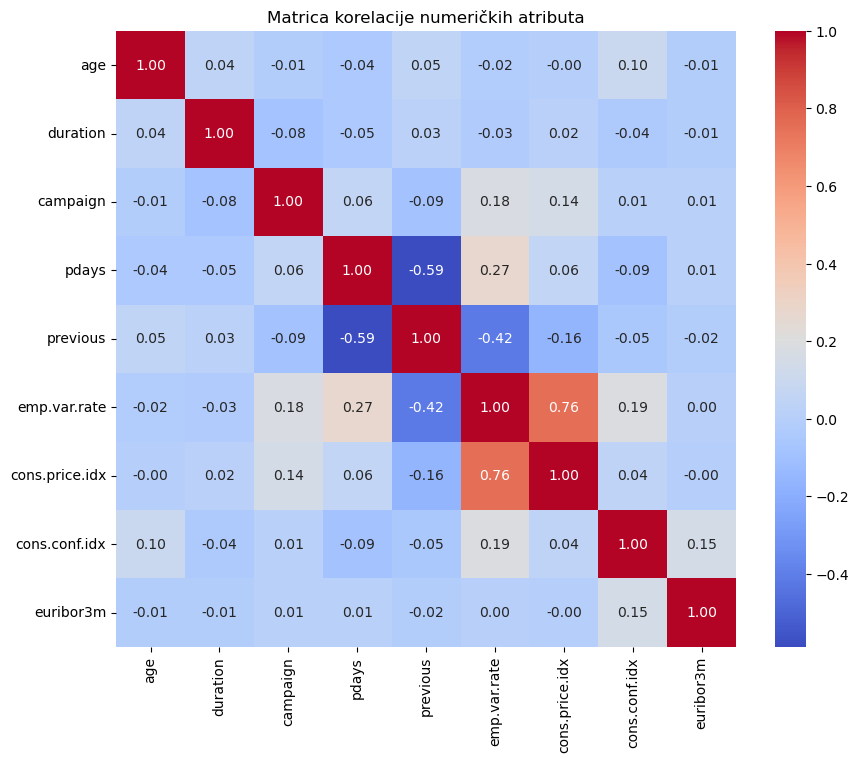

In [26]:
plt.figure(figsize=(10, 8))
sns.heatmap(matrica_korelacije, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Matrica korelacije numeričkih atributa')
plt.show()

Vrednosti koje su blizu 1 ili -1 pokazuju snaznu korelaciju, a vrednosti oko nule pokazuju nikakvu korelaciju. Visoke vrednosti korelacije izmedju atributa koji se koriste za predvidjanje je negativna pojava (Multikolinearnost). Cini se da su cons.price,idx i emp.var.rate  visoko korelisane, te bi mozda jednu od njih trebalo izbaciti

# 2. Priprema podataka 

 U ovoj fazi je potrebno prilagoditi skup podataka tako da on bude adekvatan za predvidjanje. Kategoricke podatke treba kvantifikovati, nepostojece popuniti ili obrisati, i potrebno je napraviti izvedene atribute. 

#### Duration

In [29]:
df.loc[df['duration']==0]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1950,39,admin.,married,high.school,no,yes,no,telephone,may,tue,...,4.0,999,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191,no


Kompanija koja je prikupljala podatke je do klijenata dolazila iskljucivo telefonskim putem,a zadatak je da se predvidi uspesnost telemarketinga. Problem sa atributom Duration je sto ako je njegova vrednost 0, onda poziv nije obavljen i izlaz je samim tim poznat. Trajanje poziva je nesto sto znamo nakon sto dobijemo ishod, i nema nikakvog smisla predvidjati na osnovu toga.

In [31]:
df['duration_minutes'] = df['duration'] / 60
df['duration_minutes'] = df['duration_minutes'].round(2)
df[['duration','duration_minutes']]
df['duration']=df['duration_minutes']

In [32]:
df = df.drop(['duration_minutes'], axis=1)

In [217]:
data = pd.read_csv('Bank Marketing/bank-additional.csv', sep=';')
data.loc[(data['duration']>60) & (data['y']=='no')].shape[0] 

3251

In [204]:
data.loc[ (data['y']=='yes')].shape[0] 

451

##### Izbacujemo kolone Default, day_of_week, month

In [33]:
df.shape

(4119, 21)

In [34]:
df = df.drop(['day_of_week'],axis=1)
df = df.drop(['default'],axis=1)
df.shape

(4119, 19)

In [35]:
df.columns

Index(['age', 'job', 'marital', 'education', 'housing', 'loan', 'contact',
       'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed', 'y'],
      dtype='object')

In [36]:
df = df.drop(['month'],axis=1)

In [37]:
df.head()

,age,job,marital,education,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,yes,no,cellular,8.12,2.0,999,0.0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,telephone,5.77,4.0,999,0.0,nonexistent,1.1,93.994,-36.4,4.855,5191,no
2,25,services,married,high.school,yes,no,telephone,3.78,1.0,999,0.0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,unknown,unknown,telephone,0.28,3.0,999,0.0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,yes,no,cellular,0.97,1.0,999,0.0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


#### Sredjivanje NaN vrednosti

U nr.employed jedna vrednost je 'no' umesto numericke, takodje njena vrednost y je Nan. Takodje, primetili smo da je samo jedna osoba nepismena, te smo nju izbacili.

In [39]:
df.loc[df['nr.employed']=='no']

,age,job,marital,education,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
780,32,blue-collar,married,basic.4y,no,yes,cellular,1.33,4.0,999,0.0,nonexistent,-1.8,92.893,1.266,5099.1,no,NaN


In [40]:
df.loc[df['education']=='illiterate']

,age,job,marital,education,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
3926,42,retired,divorced,illiterate,no,no,cellular,2.43,4.0,999,0.0,nonexistent,-2.9,92.201,-31.4,0.834,5076.2,no


Null vrednosti cemo popuniti medijanama

In [44]:
for column in df.columns:
    if column != 'y' and df[column].isnull().sum() > 0:
        median = df[column].median()
        df[column].fillna(median, inplace=True)

In [42]:
df = df[df['nr.employed'] != 'no']
df = df[df['education']!='illiterate']

In [43]:
df.shape

(4117, 18)

In [45]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
housing           0
loan              0
contact           0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

#### Sredjivanje Unknown vrednosti

In [46]:
unknown_values = df[df == 'unknown'].count()

unknown_values[unknown_values > 0] 

job           39
marital       11
education    167
housing      105
loan         105
dtype: int64

In [47]:
# Posto ih ima malo, obrisacemo redove kojima fale podaci za marital status i job
df = df.query("marital != 'unknown'")
df = df.query("job != 'unknown'")

In [48]:
df.query("housing=='unknown' & loan=='unknown'")

,age,job,marital,education,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
3,38,services,married,basic.9y,unknown,unknown,telephone,0.28,3.0,999,0.0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
41,38,blue-collar,married,basic.9y,unknown,unknown,telephone,7.17,1.0,999,0.0,nonexistent,1.4,94.465,-41.8,4.967,5228.1,no
87,47,services,single,basic.9y,unknown,unknown,telephone,13.92,3.0,999,0.0,nonexistent,1.4,94.465,-41.8,4.961,5228.1,yes
173,41,services,single,high.school,unknown,unknown,cellular,12.87,2.0,999,1.0,failure,-1.8,92.893,-46.2,1.299,5099.1,no
375,31,technician,single,professional.course,unknown,unknown,cellular,3.37,2.0,999,0.0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4023,33,blue-collar,married,basic.9y,unknown,unknown,telephone,2.35,3.0,999,0.0,nonexistent,1.1,93.994,-36.4,4.856,5191,no
4030,37,technician,divorced,professional.course,unknown,unknown,cellular,6.95,1.0,999,0.0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
4042,40,blue-collar,single,basic.9y,unknown,unknown,cellular,4.08,4.0,999,0.0,nonexistent,-0.1,93.200,-42.0,4.120,5195.8,no
4058,47,blue-collar,married,basic.4y,unknown,unknown,telephone,2.92,1.0,999,0.0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no


Vidimo da svakome kome fali loan, fali i housing i obrnuto, te cemo i te redove izbaciti

In [49]:
df = df.query("loan != 'unknown'")

In [50]:
unknown_values = df[df == 'unknown'].count()

unknown_values[unknown_values > 0] 

education    153
dtype: int64

Preostale nepoznate vrednosti se ticu edukacije. Resili smo da stepen edukacije popunimo u zavisnosti od posla kojim se osoba bavi. Za svaku profesiju odredjujemo modus edukacije, a onda tu edukaciju dodeljujemo osobama kojima je edukacija nepoznata.

In [52]:
for job in df['job'].unique():
    najcesca_edukacija = df.loc[df['job'] == job, 'education'].mode()[0]
    mask = (df['education'] == 'unknown') & (df['job'] == job)
    df.loc[mask, 'education'] = najcesca_edukacija

In [53]:
unknown_values = df[df == 'unknown'].count()

unknown_values[unknown_values > 0] 

Series([], dtype: int64)

##### Sredjivanje edukacije

In [54]:
df['education'].unique()

array(['basic.9y', 'high.school', 'university.degree',
       'professional.course', 'basic.6y', 'basic.4y'], dtype=object)

In [55]:
def edukacija(education):
    if education in ['basic.4y','basic.6y','basic.9y']:
        return 0
    elif education in ['high.school', 'professional.course']:
        return 1
    elif education == 'university.degree':
        return 2

In [56]:
df['education_broj'] = df['education'].apply(edukacija)

In [57]:
df[['education','education_broj']]

,education,education_broj
0,basic.9y,0
1,high.school,1
2,high.school,1
4,university.degree,2
5,university.degree,2
...,...,...
4114,basic.6y,0
4115,high.school,1
4116,high.school,1
4117,high.school,1


In [58]:
df['education']=df['education_broj']

In [59]:
df = df.drop(['education_broj'], axis=1)

In [60]:
df.dtypes

age                 int64
job                object
marital            object
education           int64
housing            object
loan               object
contact            object
duration          float64
campaign          float64
pdays               int64
previous          float64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed        object
y                  object
dtype: object

#### Pdays

Kao sto smo videli, broj 999 oznacava da korisnik prethodno nije kontaktiran, a ostale vrednosti znace pre koliko dana je prethodni put bio kontakriran. Kreiracemo izvedeni atribut da li je bio kontantiran umesto pdays

In [61]:
df['Da li je kontaktiran pre?'] = np.where(df['pdays'] == 999, 0, 1)

In [62]:
df['Da li je kontaktiran pre?'].unique()

array([0, 1])

In [63]:
df = df.drop(['pdays'], axis=1)

contact cemo zameniti poljem da li je poziv bio na fiksni ili ne

In [64]:
df['Da li je fiksni?'] = np.where(df['contact'] == 'telephone', 1, 0)

In [65]:
df.head()

,age,job,marital,education,housing,loan,contact,duration,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,Da li je kontaktiran pre?,Da li je fiksni?
0,30,blue-collar,married,0,yes,no,cellular,8.12,2.0,0.0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no,0,0
1,39,services,single,1,no,no,telephone,5.77,4.0,0.0,nonexistent,1.1,93.994,-36.4,4.855,5191,no,0,1
2,25,services,married,1,yes,no,telephone,3.78,1.0,0.0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no,0,1
4,47,admin.,married,2,yes,no,cellular,0.97,1.0,0.0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no,0,0
5,32,services,single,2,no,no,cellular,2.13,3.0,2.0,failure,-1.1,94.199,-37.5,0.884,4963.6,no,0,0


In [66]:
df = df.drop(['contact'], axis=1)

In [67]:
df['housing'] = df['housing'].map({'yes': 1, 'no': 0})
df['loan'] = df['loan'].map({'yes': 1, 'no': 0})

#### Job

Za job smo primetili da odredjene grupe imaju manje ili vece sklonosti ka uzimanju depozit. Studenti, penzioneri i nezaposleni imaju veci procenat od ostalih, a preduzetnici i self employed manji od ocekivanje vrednosti. Stoga smo resili da poslove odvojimo u tri grupe - oni koji ne rade, koji zive od rucnog rada i one koji se bave uslugama i upravljanjem

In [69]:
def group_job(job_title):
    if job_title in ['blue-collar', 'technician', 'housemaid']:
        return 'blue_collar'
    elif job_title in ['services', 'admin.', 'entrepreneur', 'self-employed', 'management']:
        return 'white_collar'
    else:  
        return 'ne_rade'


df['job_group'] = df['job'].apply(group_job)


print(df[['job', 'job_group']].head())

           job     job_group
0  blue-collar   blue_collar
1     services  white_collar
2     services  white_collar
4       admin.  white_collar
5     services  white_collar


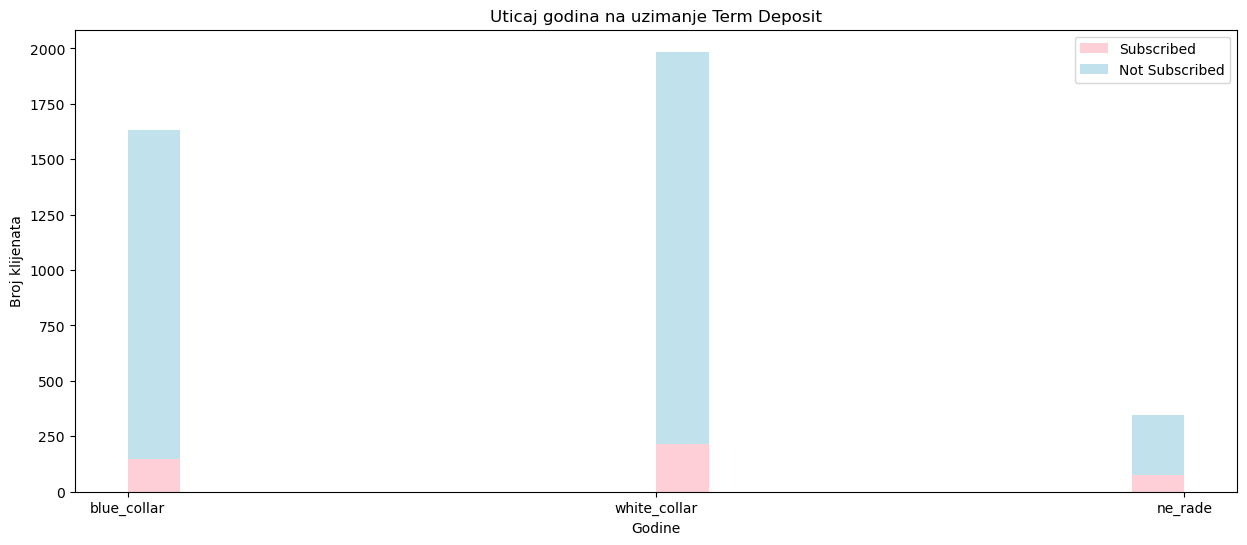

In [70]:
plt.figure(figsize=(15, 6))
plt.hist([df[df['y']=='yes']['job_group'], df[df['y']=='no']['job_group']], bins=20, alpha=0.75, label=['Subscribed', 'Not Subscribed'],
         color=['pink', 'lightblue'],stacked=True)
plt.title('Uticaj godina na uzimanje Term Deposit')
plt.xlabel('Godine')
plt.ylabel('Broj klijenata')
plt.legend()
plt.show()

In [71]:
procenat_nezaposlenih = df.query("job_group=='ne_rade' & y == 'yes'").shape[0]/ df.query("job_group=='ne_rade'").shape[0]*100
procenat_blue = df.query("job_group=='blue_collar' & y == 'yes'").shape[0]/ df.query("job_group=='blue_collar'").shape[0]*100
procenat_white = df.query("job_group=='white_collar' & y == 'yes'").shape[0]/ df.query("job_group=='white_collar'").shape[0]*100

In [72]:
print(procenat_blue)
print(procenat_nezaposlenih)
print(procenat_white)

9.001837109614206
21.802325581395348
10.831234256926953


In [73]:
df = df.drop(['job'], axis=1)

In [74]:
df.shape

(3962, 18)

In [75]:
df= pd.get_dummies(df, columns=['job_group'])

In [76]:
df

,age,marital,education,housing,loan,duration,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,Da li je kontaktiran pre?,Da li je fiksni?,job_group_blue_collar,job_group_ne_rade,job_group_white_collar
0,30,married,0,1,0,8.12,2.0,0.0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no,0,0,True,False,False
1,39,single,1,0,0,5.77,4.0,0.0,nonexistent,1.1,93.994,-36.4,4.855,5191,no,0,1,False,False,True
2,25,married,1,1,0,3.78,1.0,0.0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no,0,1,False,False,True
4,47,married,2,1,0,0.97,1.0,0.0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no,0,0,False,False,True
5,32,single,2,0,0,2.13,3.0,2.0,failure,-1.1,94.199,-37.5,0.884,4963.6,no,0,0,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,married,0,1,1,0.88,1.0,0.0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no,0,0,False,False,True
4115,39,married,1,1,0,3.65,1.0,0.0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,no,0,1,False,False,True
4116,27,single,1,0,0,1.07,2.0,1.0,failure,-1.8,92.893,-46.2,1.354,5099.1,no,0,0,False,True,False
4117,58,married,1,0,0,8.80,1.0,0.0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no,0,0,False,False,True


Za bracni status nismo primetili nikakvu korelaciju sa izlaznom promenljivom, pa smo je izbacili

In [77]:
df = df.drop(['marital'], axis=1)

#### GODINE
 Godine imaju veliki raspon vrednosti, te cemo ih podeliti na kvartile

In [78]:
df['age'].describe()

count    3962.000000
mean       40.058556
std        10.313006
min        18.000000
25%        32.000000
50%        38.000000
75%        47.000000
max        88.000000
Name: age, dtype: float64

In [79]:
def godisnje_grupe(age):
    if age < 32:
        return 0
    elif age >= 32 and age < 38:
        return 1
    elif age >= 38 and age < 47:
        return 2
    else: 
        return 3

In [80]:
df['age_group'] = df['age'].apply(godisnje_grupe)

In [81]:
df.head()

,age,education,housing,loan,duration,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,Da li je kontaktiran pre?,Da li je fiksni?,job_group_blue_collar,job_group_ne_rade,job_group_white_collar,age_group
0,30,0,1,0,8.12,2.0,0.0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no,0,0,True,False,False,0
1,39,1,0,0,5.77,4.0,0.0,nonexistent,1.1,93.994,-36.4,4.855,5191,no,0,1,False,False,True,2
2,25,1,1,0,3.78,1.0,0.0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no,0,1,False,False,True,0
4,47,2,1,0,0.97,1.0,0.0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no,0,0,False,False,True,3
5,32,2,0,0,2.13,3.0,2.0,failure,-1.1,94.199,-37.5,0.884,4963.6,no,0,0,False,False,True,1


In [82]:
df = df.drop(['age'], axis=1)

In [83]:
df.shape

(3962, 19)

### Poutcome 


Najcesca vrednost za poutcome je nonexistent, te smo resili da na sledeci nacin pretvorimo ovaj atribut u numericki

In [84]:
df['poutcome'].replace(['nonexistent', 'failure', 'success'], [0,-1,1], inplace  = True)

In [85]:
df.loc[df['poutcome']==-1]

,education,housing,loan,duration,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,Da li je kontaktiran pre?,Da li je fiksni?,job_group_blue_collar,job_group_ne_rade,job_group_white_collar,age_group
5,2,0,0,2.13,3.0,2.0,-1,-1.1,94.199,-37.5,0.884,4963.6,no,0,0,False,False,True,1
8,1,0,0,1.13,1.0,1.0,-1,-0.1,93.200,-42.0,4.153,5195.8,no,0,0,False,False,True,0
27,0,0,0,1.13,2.0,1.0,-1,-1.8,92.893,-46.2,1.299,5099.1,no,0,0,True,False,False,0
30,2,1,1,1.88,1.0,1.0,-1,-1.8,92.843,-50.0,1.687,5099.1,no,0,0,True,False,False,2
38,1,1,0,1.40,1.0,1.0,-1,-1.8,92.893,-46.2,1.334,5099.1,no,0,0,True,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4072,1,1,0,12.62,1.0,1.0,-1,-1.8,92.893,-46.2,1.250,5099.1,no,0,0,True,False,False,1
4074,2,0,0,5.97,1.0,1.0,-1,-0.1,93.200,-42.0,4.076,5195.8,no,0,0,False,False,True,2
4089,2,1,1,1.92,1.0,1.0,-1,-3.4,92.431,-26.9,0.739,5017.5,yes,0,0,False,False,True,0
4111,2,0,1,2.18,1.0,1.0,-1,-1.7,94.055,-39.8,0.748,4991.6,no,0,0,True,False,False,0


### Sredjivanje ekonomskih parametara

Ekonomske parametre smo resili da skaliramo na vrednosti od 0 do 1, jer imaju mali broj razlicitih vrednosti i mali opseg, ali se na primer krecu od 9000 do 9040

In [86]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()


df['cons.price.idx'] = scaler.fit_transform(df[['cons.price.idx']])
df['cons.conf.idx'] = scaler.fit_transform(df[['cons.conf.idx']])
df['nr.employed'] = scaler.fit_transform(df[['nr.employed']])


In [87]:
df.head()

,education,housing,loan,duration,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,Da li je kontaktiran pre?,Da li je fiksni?,job_group_blue_collar,job_group_ne_rade,job_group_white_collar,age_group
0,0,1,0,8.12,2.0,0.0,0,-1.8,0.269680,0.192469,1.313,0.512287,no,0,0,True,False,False,0
1,1,0,0,5.77,4.0,0.0,0,1.1,0.698753,0.602510,4.855,0.859735,no,0,1,False,False,True,2
2,1,1,0,3.78,1.0,0.0,0,1.4,0.882307,0.376569,4.962,1.000000,no,0,1,False,False,True,0
4,2,1,0,0.97,1.0,0.0,0,-0.1,0.389322,0.368201,4.191,0.877883,no,0,0,False,False,True,3
5,2,0,0,2.13,3.0,2.0,-1,-1.1,0.778644,0.556485,0.884,0.000000,no,0,0,False,False,True,1


Posto smo na heatmapi videli da su emp var rate i cons prive idx visoko korelisani, odlucili smo da izbacimo emp var rate

In [88]:
df = df.drop(['emp.var.rate'], axis=1)

In [89]:
for column in df.columns:

    if df[column].dtype == bool:
        
        df[column] = df[column].astype(int)

In [90]:
df['y'] = df['y'].map({'yes': 1, 'no': 0})

In [91]:
df.head()

,education,housing,loan,duration,campaign,previous,poutcome,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,Da li je kontaktiran pre?,Da li je fiksni?,job_group_blue_collar,job_group_ne_rade,job_group_white_collar,age_group
0,0,1,0,8.12,2.0,0.0,0,0.269680,0.192469,1.313,0.512287,0,0,0,1,0,0,0
1,1,0,0,5.77,4.0,0.0,0,0.698753,0.602510,4.855,0.859735,0,0,1,0,0,1,2
2,1,1,0,3.78,1.0,0.0,0,0.882307,0.376569,4.962,1.000000,0,0,1,0,0,1,0
4,2,1,0,0.97,1.0,0.0,0,0.389322,0.368201,4.191,0.877883,0,0,0,0,0,1,3
5,2,0,0,2.13,3.0,2.0,-1,0.778644,0.556485,0.884,0.000000,0,0,0,0,0,1,1


In [93]:
df['euribor3m'] = scaler.fit_transform(df[['euribor3m']])

# 3. Klasifikacija

In [94]:
df.head()

,education,housing,loan,duration,campaign,previous,poutcome,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,Da li je kontaktiran pre?,Da li je fiksni?,job_group_blue_collar,job_group_ne_rade,job_group_white_collar,age_group
0,0,1,0,8.12,2.0,0.0,0,0.269680,0.192469,0.153741,0.512287,0,0,0,1,0,0,0
1,1,0,0,5.77,4.0,0.0,0,0.698753,0.602510,0.956916,0.859735,0,0,1,0,0,1,2
2,1,1,0,3.78,1.0,0.0,0,0.882307,0.376569,0.981179,1.000000,0,0,1,0,0,1,0
4,2,1,0,0.97,1.0,0.0,0,0.389322,0.368201,0.806349,0.877883,0,0,0,0,0,1,3
5,2,0,0,2.13,3.0,2.0,-1,0.778644,0.556485,0.056463,0.000000,0,0,0,0,0,1,1


In [95]:
df_backup = df

In [96]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

In [97]:

from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score

Podela seta podataka i izlazne promenljive

In [221]:
y = df['y']
df_final = df.drop(['y'],axis=1)
df_final = df.drop(['duration'],axis=1)

In [228]:
df_final.head()

,education,housing,loan,campaign,previous,poutcome,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,Da li je kontaktiran pre?,Da li je fiksni?,job_group_blue_collar,job_group_ne_rade,job_group_white_collar,age_group
0,0,1,0,2.0,0.0,0,0.269680,0.192469,0.153741,0.512287,0,0,1,0,0,0
1,1,0,0,4.0,0.0,0,0.698753,0.602510,0.956916,0.859735,0,1,0,0,1,2
2,1,1,0,1.0,0.0,0,0.882307,0.376569,0.981179,1.000000,0,1,0,0,1,0
4,2,1,0,1.0,0.0,0,0.389322,0.368201,0.806349,0.877883,0,0,0,0,1,3
5,2,0,0,3.0,2.0,-1,0.778644,0.556485,0.056463,0.000000,0,0,0,0,1,1


### 3.1 Logisticka regresija

In [229]:

X_train, X_test, y_train, y_test = train_test_split(df_final, y, test_size = 0.3, random_state = 101)

logreg = LogisticRegression(random_state=101)


logreg.fit(X_train, y_train)

LogisticRegression(random_state=101)

In [230]:
# Predviđanje na trening skupu
y_pred_train_lr = logreg.predict(X_train)

# Predviđanje na test skupu
y_pred_test_lr = logreg.predict(X_test)


metrics = {
    'Tacnost': [accuracy_score(y_train, y_pred_train_lr), accuracy_score(y_test, y_pred_test_lr)],
    'Preciznost': [precision_score(y_train, y_pred_train_lr, average='weighted'), 
                  precision_score(y_test, y_pred_test_lr, average='weighted')],
    'Odziv': [recall_score(y_train, y_pred_train_lr, average='weighted'), 
               recall_score(y_test, y_pred_test_lr, average='weighted')],
    'F1 statistika': [f1_score(y_train, y_pred_train_lr, average='weighted'), 
                 f1_score(y_test, y_pred_test_lr, average='weighted')]
}

metrics_df = pd.DataFrame(metrics, index=['Training Set', 'Test Set'])

# Prikaz DataFrame-a sa metrikama
print(metrics_df)

               Tacnost  Preciznost     Odziv  F1 statistika
Training Set  0.906239    0.890318  0.906239       0.882099
Test Set      0.890664    0.870882  0.890664       0.861108


### Kros validacija

In [231]:
df_cross = df_final
y_cross = y

In [232]:
y_cross = pd.DataFrame(y)

In [234]:
df_cross

,education,housing,loan,campaign,previous,poutcome,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,Da li je kontaktiran pre?,Da li je fiksni?,job_group_blue_collar,job_group_ne_rade,job_group_white_collar,age_group
0,0,1,0,2.0,0.0,0,0.269680,0.192469,0.153741,0.512287,0,0,1,0,0,0
1,1,0,0,4.0,0.0,0,0.698753,0.602510,0.956916,0.859735,0,1,0,0,1,2
2,1,1,0,1.0,0.0,0,0.882307,0.376569,0.981179,1.000000,0,1,0,0,1,0
4,2,1,0,1.0,0.0,0,0.389322,0.368201,0.806349,0.877883,0,0,0,0,1,3
5,2,0,0,3.0,2.0,-1,0.778644,0.556485,0.056463,0.000000,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,0,1,1,1.0,0.0,0,0.669135,0.338912,0.980272,1.000000,0,0,0,0,1,0
4115,1,1,0,1.0,0.0,0,0.669135,0.338912,0.980499,1.000000,0,1,0,0,1,2
4116,1,0,0,2.0,1.0,-1,0.269680,0.192469,0.163039,0.512287,0,0,0,1,0,0
4117,1,0,0,1.0,0.0,0,0.484412,0.615063,0.982086,1.000000,0,0,0,0,1,3


In [235]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)

model = LogisticRegression()
accuracy_list = []


for train_index, test_index in kf.split(df_cross):  
    X_train, X_test = df_cross.iloc[train_index], df_cross.iloc[test_index]
    y_train, y_test = y_cross.iloc[train_index]['y'], y_cross.iloc[test_index]['y']

    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    accuracy_list.append(accuracy)


print(f'Tacnosti: {accuracy_list}')
print(f'Prosecna tacnost: {np.mean(accuracy_list)}')


Tacnosti: [0.9143576826196473, 0.889168765743073, 0.9191919191919192, 0.9065656565656566, 0.8863636363636364, 0.8914141414141414, 0.8914141414141414, 0.8888888888888888, 0.9166666666666666, 0.9040404040404041]
Prosecna tacnost: 0.9008071902908176


#### Prosecna tacnost predvidjanja za logisticku regresiju je porasla 

In [236]:
df_final2 = df_final.drop(columns=['campaign'], axis=1)

In [237]:
df_final2 = df_final2.drop(columns=['poutcome'], axis=1)

In [238]:
df_final2

,education,housing,loan,previous,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,Da li je kontaktiran pre?,Da li je fiksni?,job_group_blue_collar,job_group_ne_rade,job_group_white_collar,age_group
0,0,1,0,0.0,0.269680,0.192469,0.153741,0.512287,0,0,1,0,0,0
1,1,0,0,0.0,0.698753,0.602510,0.956916,0.859735,0,1,0,0,1,2
2,1,1,0,0.0,0.882307,0.376569,0.981179,1.000000,0,1,0,0,1,0
4,2,1,0,0.0,0.389322,0.368201,0.806349,0.877883,0,0,0,0,1,3
5,2,0,0,2.0,0.778644,0.556485,0.056463,0.000000,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,0,1,1,0.0,0.669135,0.338912,0.980272,1.000000,0,0,0,0,1,0
4115,1,1,0,0.0,0.669135,0.338912,0.980499,1.000000,0,1,0,0,1,2
4116,1,0,0,1.0,0.269680,0.192469,0.163039,0.512287,0,0,0,1,0,0
4117,1,0,0,0.0,0.484412,0.615063,0.982086,1.000000,0,0,0,0,1,3


#### Izbacili smo dva atributa i pokusacemo opet  da uradimo kros validaciju

In [239]:
df_cross2 = df_final2

y_cross2 = pd.DataFrame(y)

In [240]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)

model = LogisticRegression()
accuracy_list = []


for train_index, test_index in kf.split(df_cross2):  
    X_train, X_test = df_cross2.iloc[train_index], df_cross2.iloc[test_index]
    y_train, y_test = y_cross2.iloc[train_index]['y'], y_cross2.iloc[test_index]['y']

    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    accuracy_list.append(accuracy)


print(f'Tacnosti: {accuracy_list}')
print(f'Prosecna tacnost: {np.mean(accuracy_list)}')

Tacnosti: [0.9143576826196473, 0.889168765743073, 0.9191919191919192, 0.9040404040404041, 0.8863636363636364, 0.8914141414141414, 0.8914141414141414, 0.8838383838383839, 0.9141414141414141, 0.9015151515151515]
Prosecna tacnost: 0.8995445640281913


### Podesavanje parametara logisticke regresije

In [241]:
X_train, X_test, y_train, y_test = train_test_split(df_final2, y, test_size = 0.3, random_state = 101)

logreg = LogisticRegression(penalty='l1', 
                           C=1,        
                           solver='liblinear', 
                           max_iter=100,   
                           random_state=101 
                          )


logreg.fit(X_train, y_train)

y_pred_train_lr = logreg.predict(X_train)


y_pred_test_lr = logreg.predict(X_test)
metrics = {
    'Tacnost': [accuracy_score(y_train, y_pred_train_lr), accuracy_score(y_test, y_pred_test_lr)],
    'Preciznost': [precision_score(y_train, y_pred_train_lr, average='weighted'), 
                  precision_score(y_test, y_pred_test_lr, average='weighted')],
    'Odziv': [recall_score(y_train, y_pred_train_lr, average='weighted'), 
               recall_score(y_test, y_pred_test_lr, average='weighted')],
    'F1 statistika': [f1_score(y_train, y_pred_train_lr, average='weighted'), 
                 f1_score(y_test, y_pred_test_lr, average='weighted')]
}

metrics_df = pd.DataFrame(metrics, index=['Training Set', 'Test Set'])


print(metrics_df)

               Tacnost  Preciznost     Odziv  F1 statistika
Training Set  0.906599    0.890562  0.906599       0.883457
Test Set      0.889823    0.868325  0.889823       0.861402


In [242]:
X_train, X_test, y_train, y_test = train_test_split(df_final2, y, test_size = 0.3, random_state = 101)

logreg = LogisticRegression(penalty='l1', 
                           C=0.6,        
                           solver='liblinear', 
                           max_iter=100,   
                           random_state=101 
                          )


logreg.fit(X_train, y_train)

y_pred_train_lr = logreg.predict(X_train)


y_pred_test_lr = logreg.predict(X_test)
metrics = {
    'Tacnost': [accuracy_score(y_train, y_pred_train_lr), accuracy_score(y_test, y_pred_test_lr)],
    'Preciznost': [precision_score(y_train, y_pred_train_lr, average='weighted'), 
                  precision_score(y_test, y_pred_test_lr, average='weighted')],
    'Odziv': [recall_score(y_train, y_pred_train_lr, average='weighted'), 
               recall_score(y_test, y_pred_test_lr, average='weighted')],
    'F1 statistika': [f1_score(y_train, y_pred_train_lr, average='weighted'), 
                 f1_score(y_test, y_pred_test_lr, average='weighted')]
}

metrics_df = pd.DataFrame(metrics, index=['Training Set', 'Test Set'])

print(metrics_df)

               Tacnost  Preciznost     Odziv  F1 statistika
Training Set  0.906239    0.890318  0.906239       0.882099
Test Set      0.888982    0.866558  0.888982       0.859892


In [243]:
X_train, X_test, y_train, y_test = train_test_split(df_final2, y, test_size = 0.3, random_state = 101)

logreg = LogisticRegression(penalty='l2', 
                           C=1.5,        
                           solver='liblinear', 
                           max_iter=100,   
                           random_state=101 
                          )


logreg.fit(X_train, y_train)

y_pred_train_lr = logreg.predict(X_train)

y_pred_test_lr = logreg.predict(X_test)
metrics = {
    'Tacnost': [accuracy_score(y_train, y_pred_train_lr), accuracy_score(y_test, y_pred_test_lr)],
    'Preciznost': [precision_score(y_train, y_pred_train_lr, average='weighted'), 
                  precision_score(y_test, y_pred_test_lr, average='weighted')],
    'Odziv': [recall_score(y_train, y_pred_train_lr, average='weighted'), 
               recall_score(y_test, y_pred_test_lr, average='weighted')],
    'F1 statistika': [f1_score(y_train, y_pred_train_lr, average='weighted'), 
                 f1_score(y_test, y_pred_test_lr, average='weighted')]
}

metrics_df = pd.DataFrame(metrics, index=['Training Set', 'Test Set'])


print(metrics_df)

               Tacnost  Preciznost     Odziv  F1 statistika
Training Set  0.906599    0.890562  0.906599       0.883457
Test Set      0.889823    0.868325  0.889823       0.861402


In [244]:
X_train, X_test, y_train, y_test = train_test_split(df_final2, y, test_size = 0.3, random_state = 101)

logreg = LogisticRegression(penalty='l1', 
                           C=1,        
                           solver='liblinear', 
                           max_iter=100,   
                           random_state=101 
                          )


logreg.fit(X_train, y_train)
u
y_pred_train_lr = logreg.predict(X_train)


y_pred_test_lr = logreg.predict(X_test)
metrics = {
    'Tacnost': [accuracy_score(y_train, y_pred_train_lr), accuracy_score(y_test, y_pred_test_lr)],
    'Preciznost': [precision_score(y_train, y_pred_train_lr, average='weighted'), 
                  precision_score(y_test, y_pred_test_lr, average='weighted')],
    'Odziv': [recall_score(y_train, y_pred_train_lr, average='weighted'), 
               recall_score(y_test, y_pred_test_lr, average='weighted')],
    'F1 statistika': [f1_score(y_train, y_pred_train_lr, average='weighted'), 
                 f1_score(y_test, y_pred_test_lr, average='weighted')]
}

metrics_df = pd.DataFrame(metrics, index=['Training Set', 'Test Set'])

# Prikaz DataFrame-a sa metrikama
print(metrics_df)

               Tacnost  Preciznost     Odziv  F1 statistika
Training Set  0.906599    0.890562  0.906599       0.883457
Test Set      0.889823    0.868325  0.889823       0.861402


In [245]:
df_backup = df_final2

In [246]:
y_backup = y

## 3.2 KNN

k=1 84.64 (+/- 2.01)
k=2 88.78 (+/- 1.54)
k=3 87.99 (+/- 1.52)
k=4 88.97 (+/- 1.46)
k=5 89.11 (+/- 1.47)
k=6 89.33 (+/- 1.53)
k=7 89.18 (+/- 1.44)
k=8 89.43 (+/- 1.56)
k=9 89.25 (+/- 1.49)
k=10 89.18 (+/- 1.61)
k=11 89.15 (+/- 1.48)
k=12 89.14 (+/- 1.69)
k=13 89.15 (+/- 1.70)
k=14 89.40 (+/- 1.52)
k=15 89.43 (+/- 1.47)
k=16 89.40 (+/- 1.53)
k=17 89.43 (+/- 1.61)
k=18 89.43 (+/- 1.67)
k=19 89.40 (+/- 1.70)
k=20 89.25 (+/- 1.64)
k=21 89.25 (+/- 1.62)
k=22 89.33 (+/- 1.55)
k=23 89.22 (+/- 1.58)
k=24 89.15 (+/- 1.50)
k=25 89.14 (+/- 1.53)
Optimalan broj suseda je 7 sa 89.4%


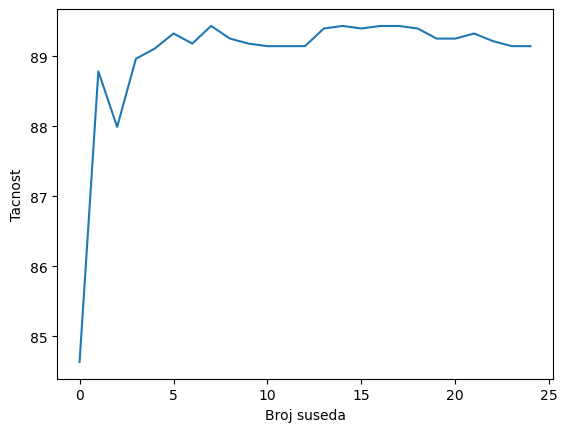

In [247]:
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier

X_trainK, X_testK, y_trainK, y_testK = train_test_split(df_final2, y, test_size = 0.3)


neighbors = np.arange(0,25)


cv_scores = []


for k in neighbors:
    k_value = k+1
    knn = KNeighborsClassifier(n_neighbors = k_value, weights='uniform', p=2, metric='euclidean')
    kfold = model_selection.KFold(n_splits=10)
    scores = model_selection.cross_val_score(knn, X_trainK, y_trainK, cv=kfold, scoring='accuracy')
    cv_scores.append(scores.mean()*100)
    print("k=%d %0.2f (+/- %0.2f)" % (k_value, scores.mean()*100, scores.std()*100))

optimal_k = neighbors[cv_scores.index(max(cv_scores))]
print ("Optimalan broj suseda je %d sa %0.1f%%" % (optimal_k, cv_scores[optimal_k]))

plt.plot(neighbors, cv_scores)
plt.xlabel('Broj suseda')
plt.ylabel('Tacnost')
plt.show()

In [248]:
knn = KNeighborsClassifier(n_neighbors=optimal_k, weights='uniform', p=2, metric='euclidean')
knn.fit(X_trainK, y_trainK)
y_predK = knn.predict(X_testK)
conf_matrix = confusion_matrix(y_testK, y_predK)
print('Matrica konfuzije:')
print(conf_matrix)



Matrica konfuzije:
[[1044   13]
 [ 111   21]]


### Pomeranje praga odluke

In [249]:
knn = KNeighborsClassifier(n_neighbors=optimal_k, weights='uniform', p=2, metric='euclidean')
knn.fit(X_trainK, y_trainK)


y_probaK = knn.predict_proba(X_testK)

thresholds = [0.1,0.3, 0.5, 0.7,0.9]
for threshold in thresholds:
   
    y_predK = (y_probaK[:, 1] >= threshold).astype(int)
    conf_matrix = confusion_matrix(y_testK, y_predK)
    print(f'Matrica konfuzije za prag {threshold}:')
    print(conf_matrix)
    print('')

Matrica konfuzije za prag 0.1:
[[654 403]
 [ 57  75]]

Matrica konfuzije za prag 0.3:
[[1018   39]
 [  98   34]]

Matrica konfuzije za prag 0.5:
[[1044   13]
 [ 111   21]]

Matrica konfuzije za prag 0.7:
[[1052    5]
 [ 119   13]]

Matrica konfuzije za prag 0.9:
[[1057    0]
 [ 131    1]]



## 3.3 Random Forest

In [250]:
X_train, X_test, y_train, y_test = train_test_split(df_final2, y, test_size = 0.3, random_state = 101)
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

rfc = RandomForestClassifier(n_estimators = 30,criterion='gini')
rfc.fit(X_train, y_train)
rfcpred = rfc.predict(X_test)

print(confusion_matrix(y_test, rfcpred ))
print(round(accuracy_score(y_test, rfcpred),2)*100)
RFCCV = (cross_val_score(rfc, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[1000   46]
 [ 114   29]]
87.0


### Podesavanje parametara Random Foresta pomocu Grid Searcha

In [251]:
from sklearn.model_selection import GridSearchCV


param_grid = {
    'n_estimators': [10, 30, 100],
    'max_depth': [None, 6, 12, 24,36],
    'min_samples_split': [ 10,15,20],
    'min_samples_leaf': [4,6,12]
}


grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=k_fold, n_jobs=-1, scoring='accuracy')

grid_search.fit(X_train, y_train)


print(grid_search.best_params_)

{'max_depth': 36, 'min_samples_leaf': 12, 'min_samples_split': 15, 'n_estimators': 10}


In [150]:
param_grid = {
    'n_estimators': [10, 30, 100],
    'max_depth': [None, 4,6],
    'min_samples_split': [ 7,8,10,15,20],
    'min_samples_leaf': [4,6,8]
}


grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=k_fold, n_jobs=-1, scoring='accuracy')


grid_search.fit(X_train, y_train)


print(grid_search.best_params_)

{'max_depth': None, 'min_samples_leaf': 6, 'min_samples_split': 20, 'n_estimators': 100}


In [252]:
rfc = RandomForestClassifier(n_estimators = 10,criterion='gini',max_depth=36,min_samples_leaf=12,min_samples_split=15)#criterion = entopy,gini
rfc.fit(X_train, y_train)
rfcpred = rfc.predict(X_test)

print(confusion_matrix(y_test, rfcpred ))
print(round(accuracy_score(y_test, rfcpred),2)*100)
RFCCV = (cross_val_score(rfc, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[1032   14]
 [ 116   27]]
89.0


In [165]:
rfc = RandomForestClassifier(n_estimators = 100,criterion='gini',max_depth=None,min_samples_leaf=6,min_samples_split=20)#criterion = entopy,gini
rfc.fit(X_train, y_train)
rfcpred = rfc.predict(X_test)

print(confusion_matrix(y_test, rfcpred ))
print(round(accuracy_score(y_test, rfcpred),2)*100)
RFCCV = (cross_val_score(rfc, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[1027   19]
 [  93   50]]
91.0


In [166]:
rfc = RandomForestClassifier(n_estimators = 30,criterion='gini',max_depth=24,min_samples_leaf=4,min_samples_split=10)#criterion = entopy,gini
rfc.fit(X_train, y_train)
rfcpred = rfc.predict(X_test)

print(confusion_matrix(y_test, rfcpred ))
print(round(accuracy_score(y_test, rfcpred),2)*100)
RFCCV = (cross_val_score(rfc, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[1020   26]
 [  88   55]]
90.0


In [253]:
param_grid = {
    'n_estimators': [100,200,300],
    'max_depth': [None, 10,20,30],
    'min_samples_split': [ 2,5,10],
    'min_samples_leaf': [1,2,4],
    'bootstrap': [True, False]
}


grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=k_fold, n_jobs=-1, scoring='accuracy')


grid_search.fit(X_train, y_train)


print(grid_search.best_params_)

{'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}


In [254]:
rfc = RandomForestClassifier(n_estimators = 100,criterion='gini',max_depth=20,min_samples_leaf=4,min_samples_split=10,bootstrap=True)#criterion = entopy,gini
rfc.fit(X_train, y_train)
rfcpred = rfc.predict(X_test)

print(confusion_matrix(y_test, rfcpred ))
print(round(accuracy_score(y_test, rfcpred),2)*100)
RFCCV = (cross_val_score(rfc, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[1030   16]
 [ 115   28]]
89.0


# 4. Klasterovanje

In [255]:
df_final2

,education,housing,loan,previous,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,Da li je kontaktiran pre?,Da li je fiksni?,job_group_blue_collar,job_group_ne_rade,job_group_white_collar,age_group
0,0,1,0,0.0,0.269680,0.192469,0.153741,0.512287,0,0,1,0,0,0
1,1,0,0,0.0,0.698753,0.602510,0.956916,0.859735,0,1,0,0,1,2
2,1,1,0,0.0,0.882307,0.376569,0.981179,1.000000,0,1,0,0,1,0
4,2,1,0,0.0,0.389322,0.368201,0.806349,0.877883,0,0,0,0,1,3
5,2,0,0,2.0,0.778644,0.556485,0.056463,0.000000,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,0,1,1,0.0,0.669135,0.338912,0.980272,1.000000,0,0,0,0,1,0
4115,1,1,0,0.0,0.669135,0.338912,0.980499,1.000000,0,1,0,0,1,2
4116,1,0,0,1.0,0.269680,0.192469,0.163039,0.512287,0,0,0,1,0,0
4117,1,0,0,0.0,0.484412,0.615063,0.982086,1.000000,0,0,0,0,1,3


In [256]:
import math
import scipy.stats as stats
from scipy.stats import zscore


### Autlajeri

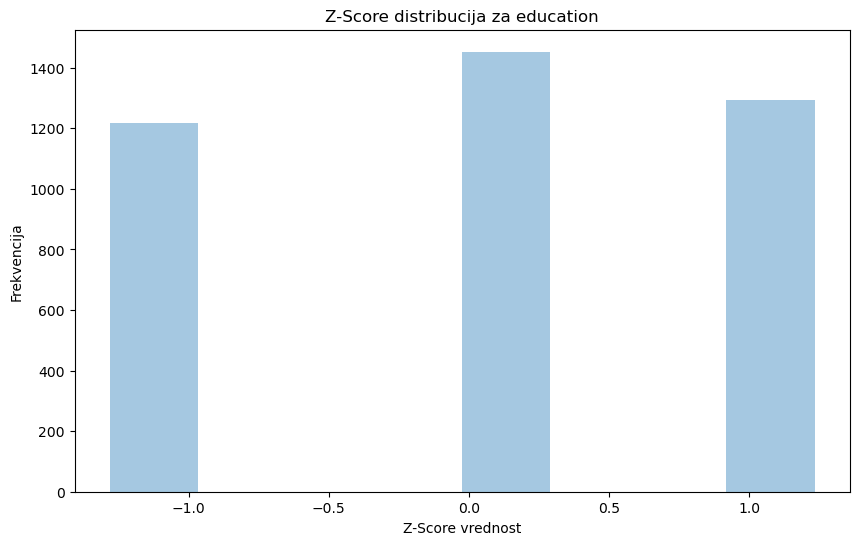

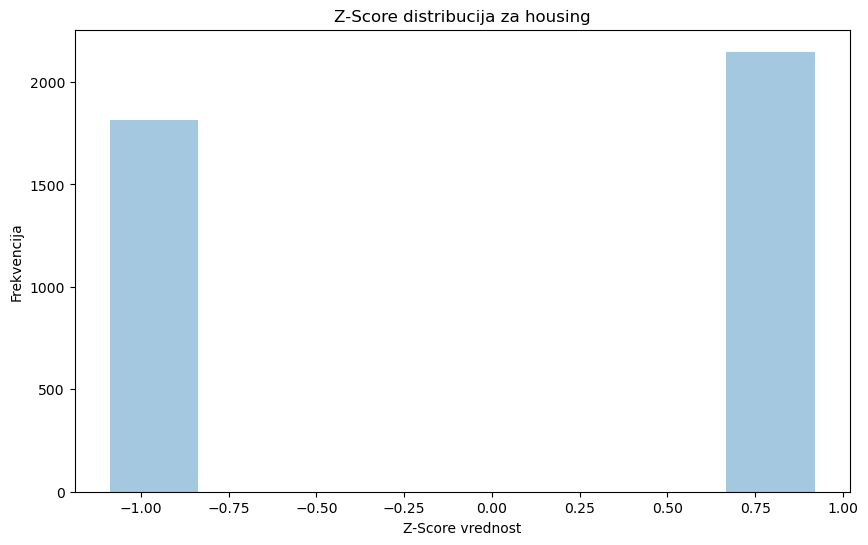

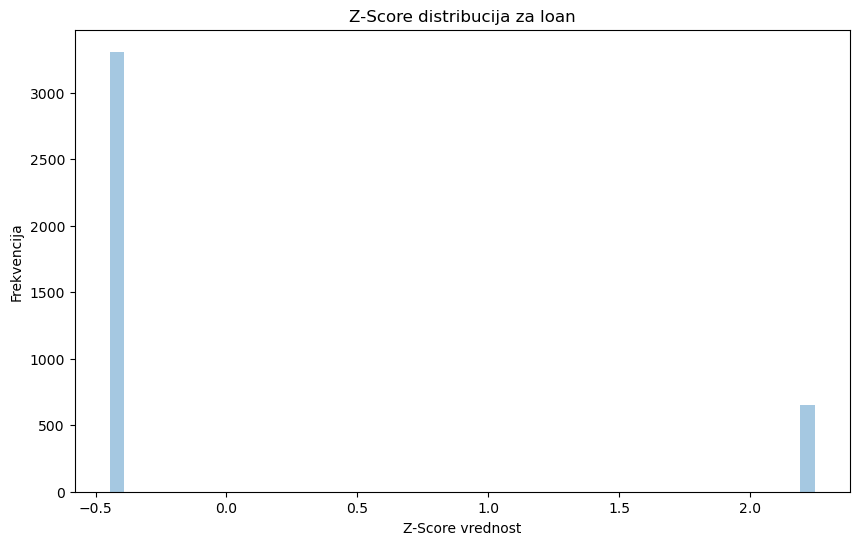

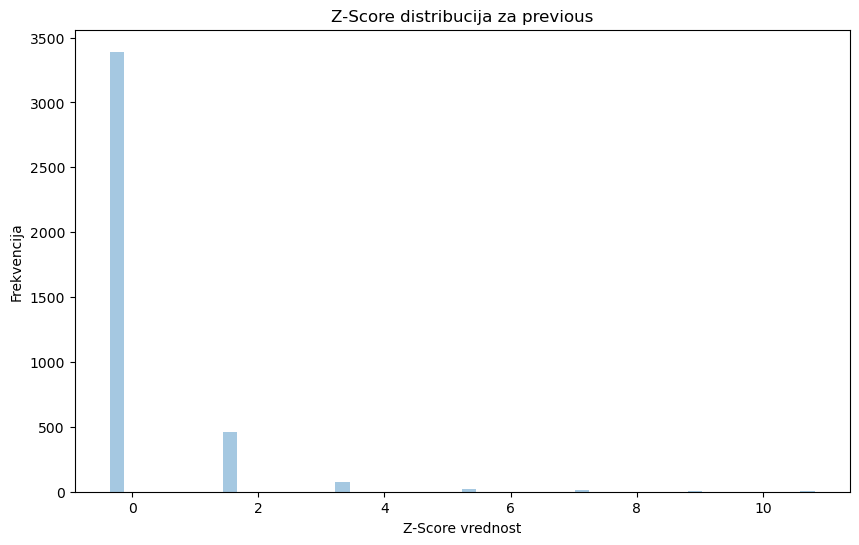

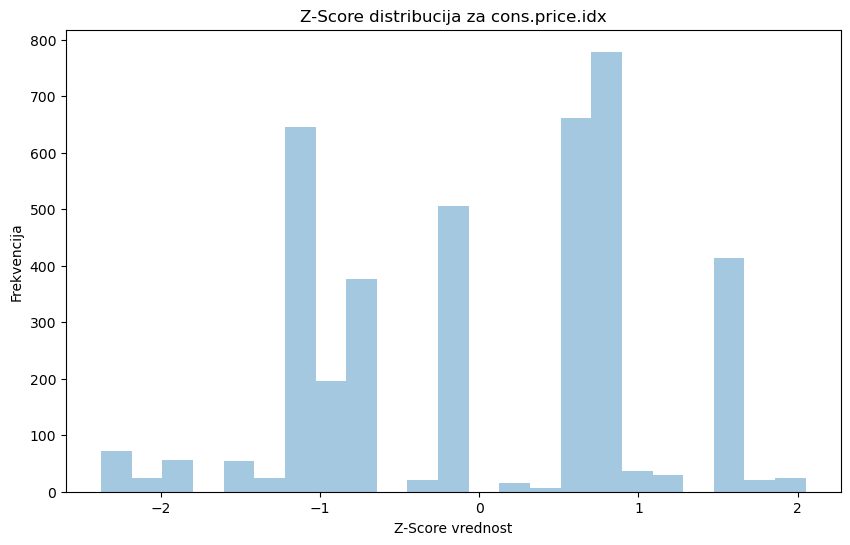

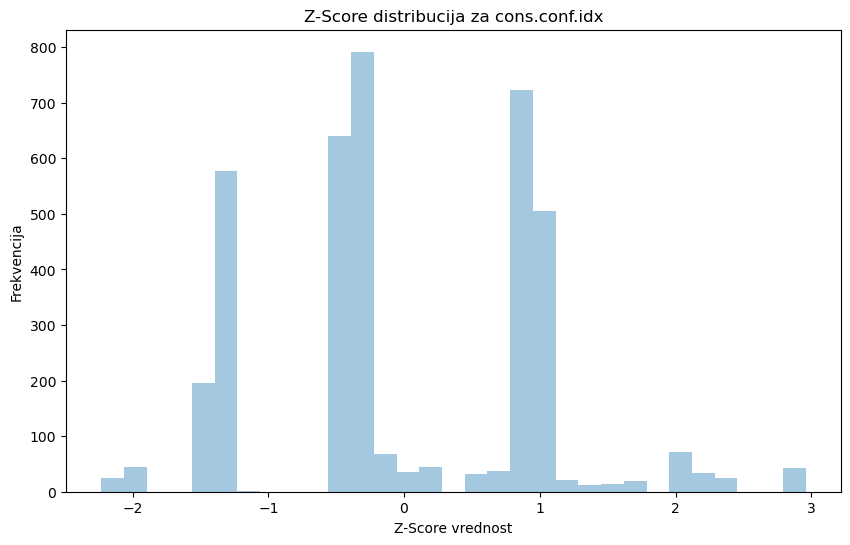

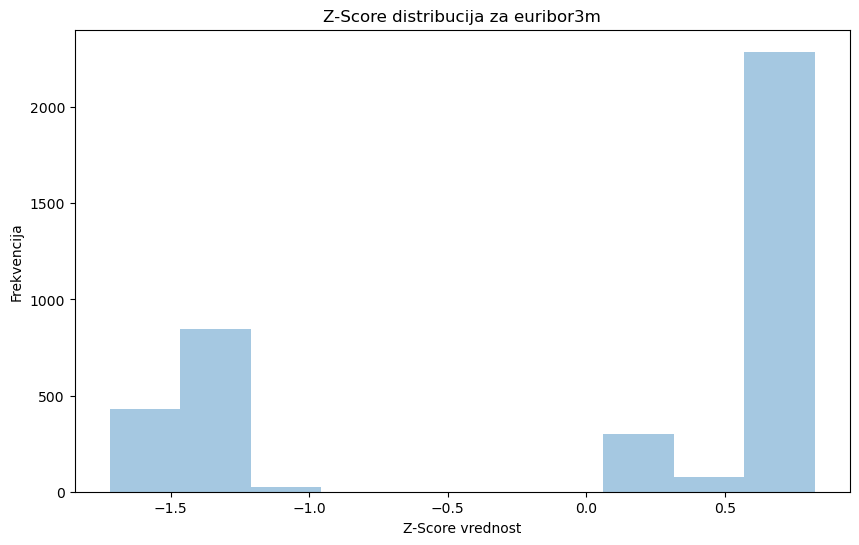

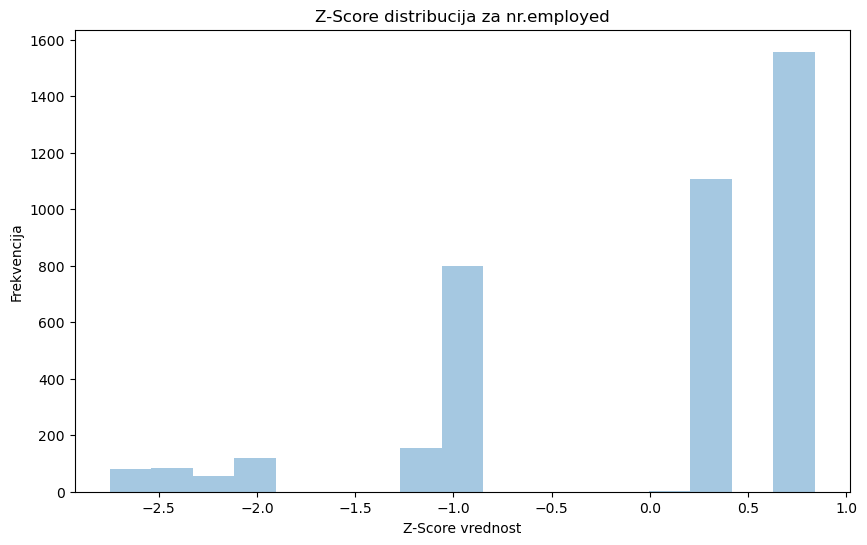

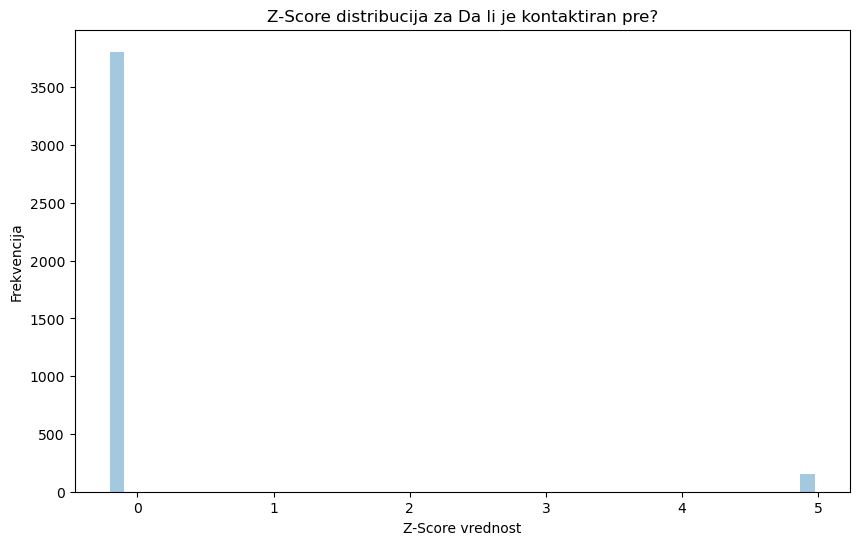

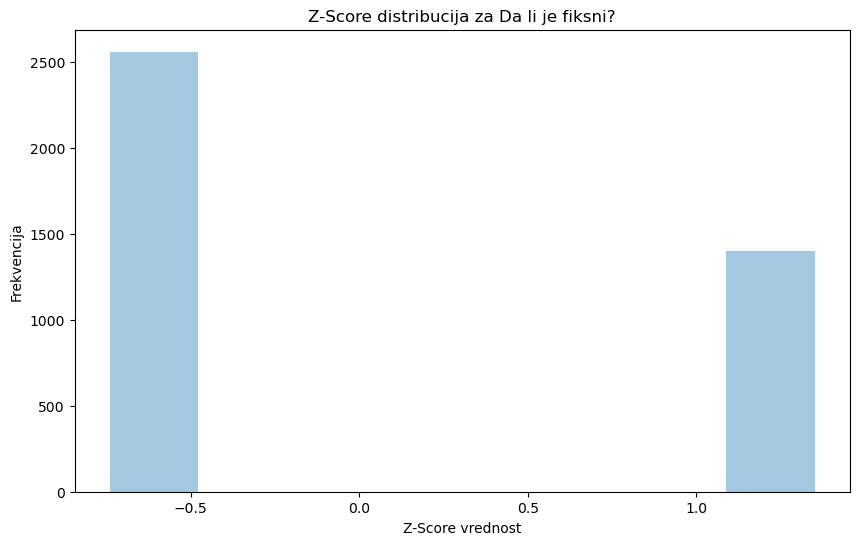

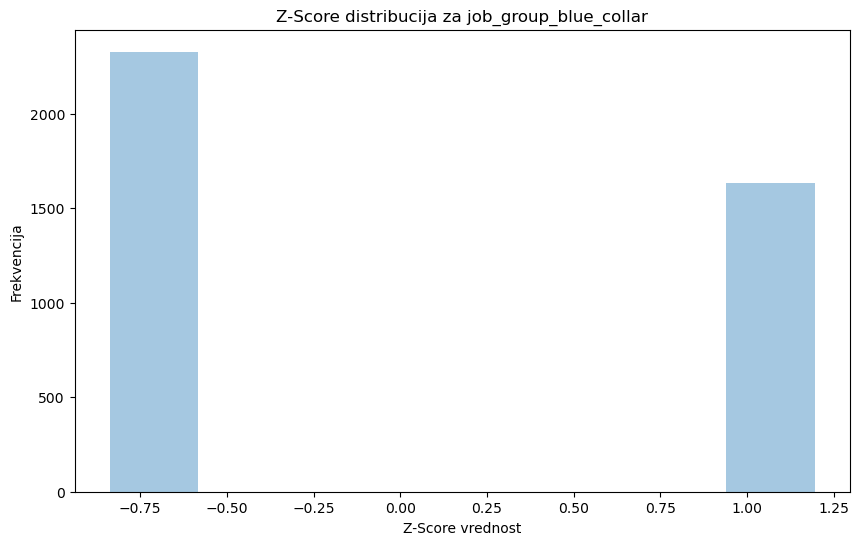

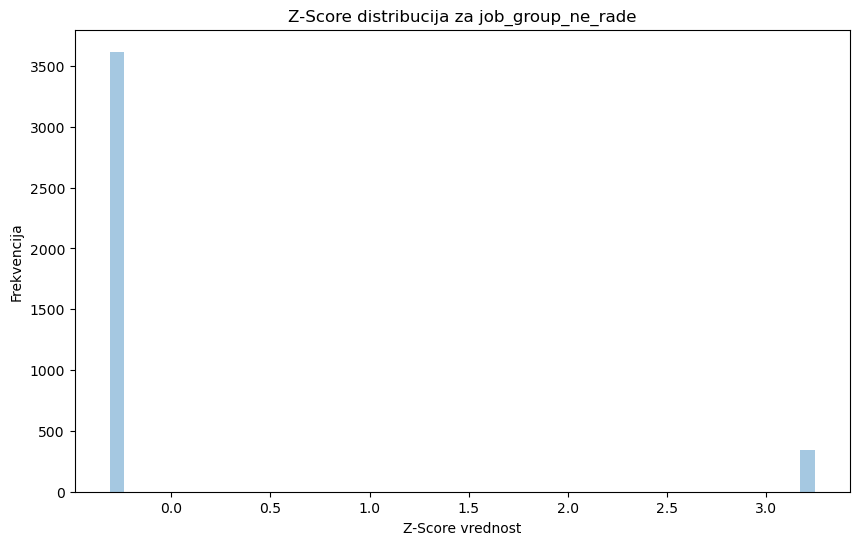

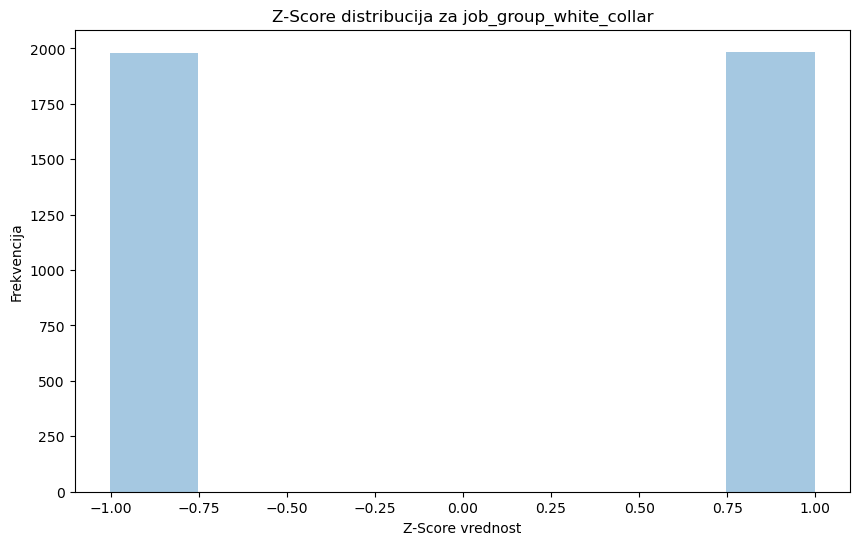

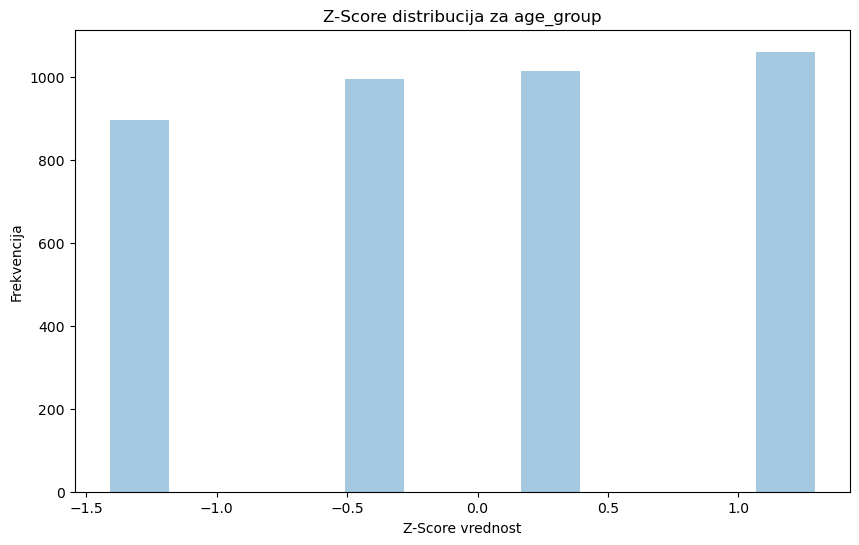

In [257]:
z_scores = df_final2.apply(zscore)
for column in z_scores.columns:
    plt.figure(figsize=(10, 6))
    sns.distplot(z_scores[column], kde=False)
    plt.title(f'Z-Score distribucija za {column}')
    plt.ylabel('Frekvencija')
    plt.xlabel('Z-Score vrednost')
    plt.show()

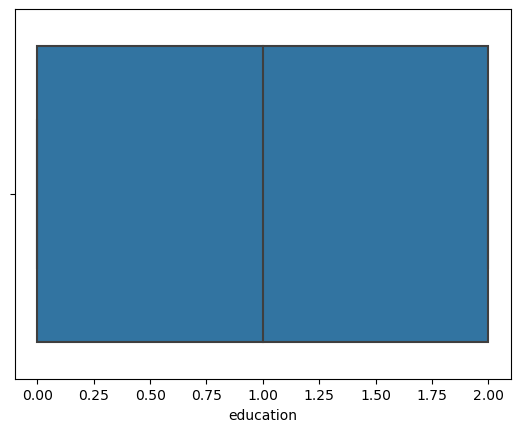

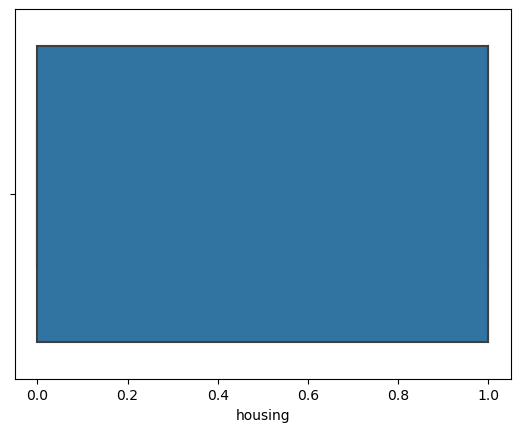

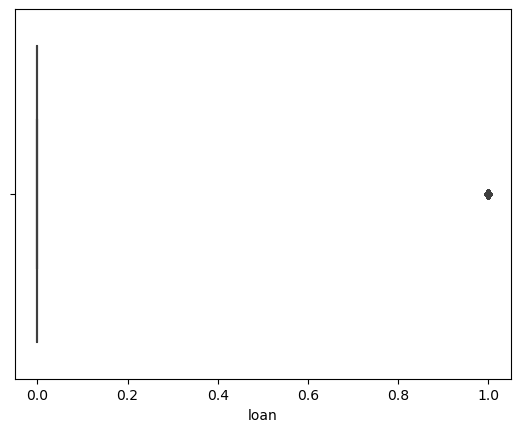

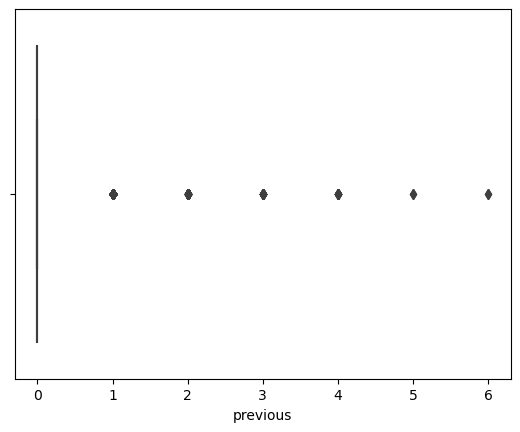

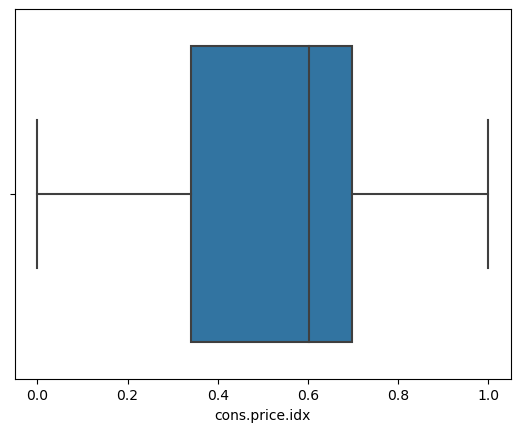

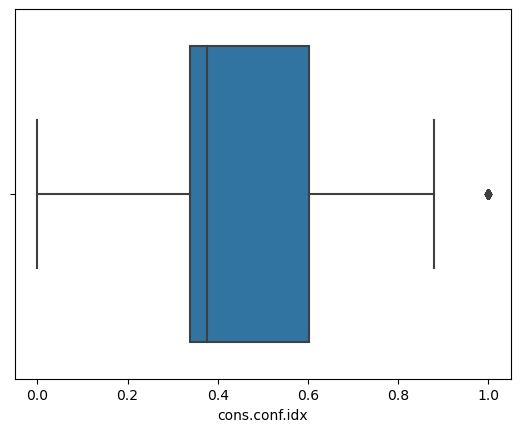

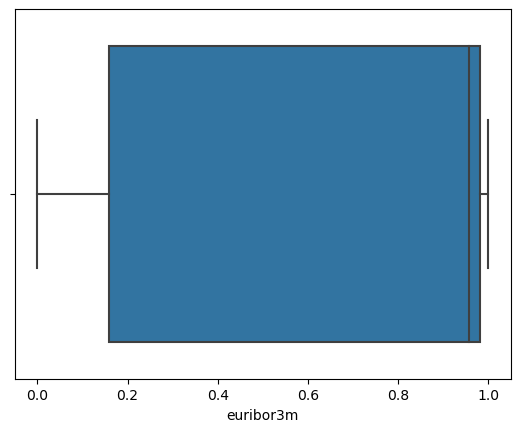

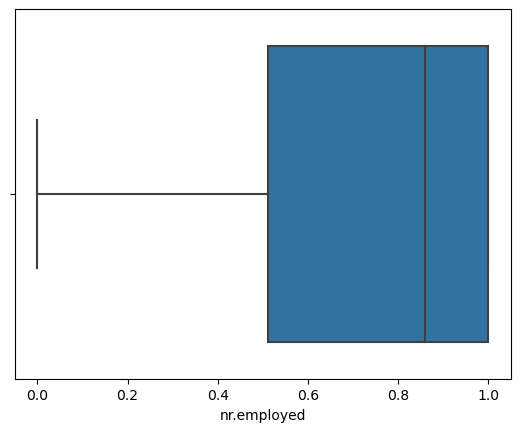

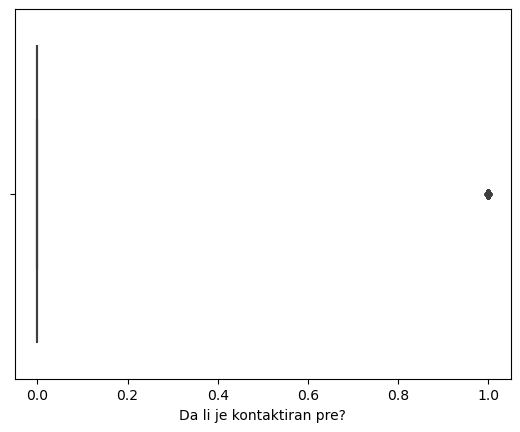

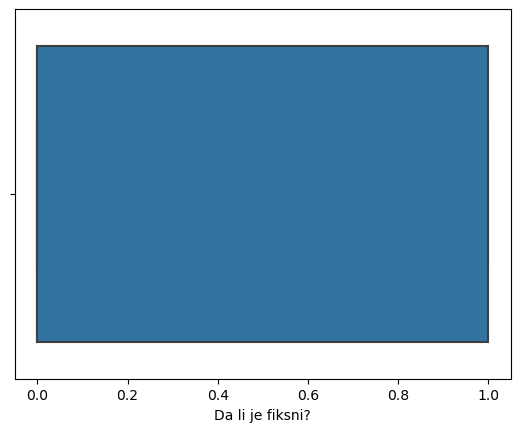

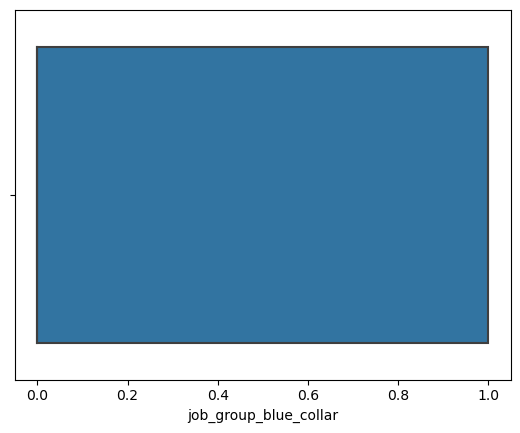

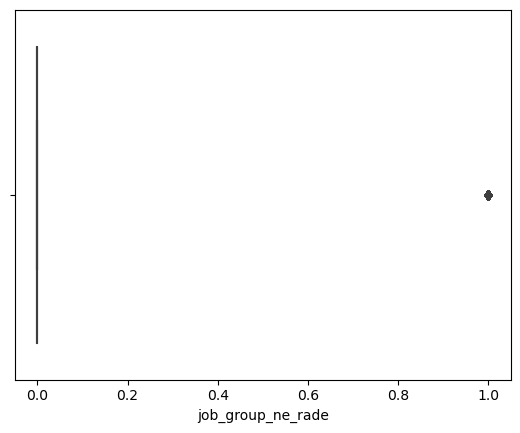

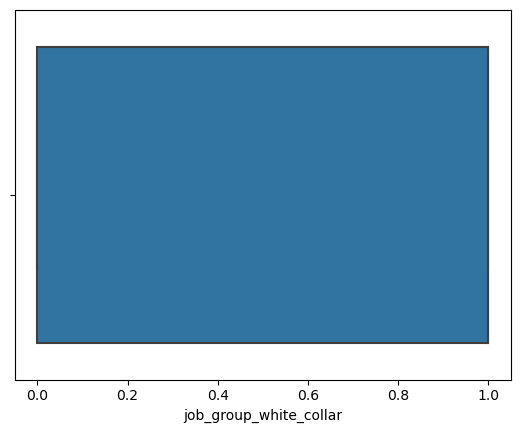

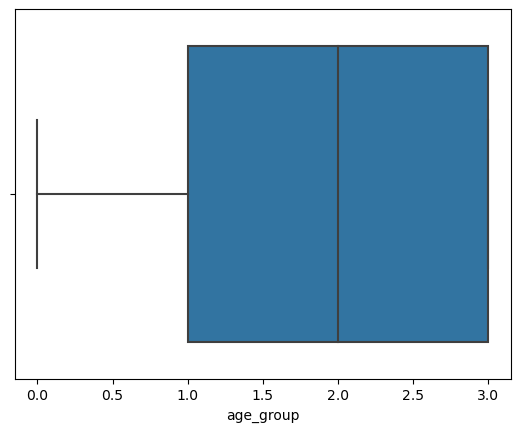

In [258]:
for column in df_final2.columns:
    sns.boxplot(data = df_final2,x=column)
    plt.show()
  

In [259]:
df_final2

,education,housing,loan,previous,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,Da li je kontaktiran pre?,Da li je fiksni?,job_group_blue_collar,job_group_ne_rade,job_group_white_collar,age_group
0,0,1,0,0.0,0.269680,0.192469,0.153741,0.512287,0,0,1,0,0,0
1,1,0,0,0.0,0.698753,0.602510,0.956916,0.859735,0,1,0,0,1,2
2,1,1,0,0.0,0.882307,0.376569,0.981179,1.000000,0,1,0,0,1,0
4,2,1,0,0.0,0.389322,0.368201,0.806349,0.877883,0,0,0,0,1,3
5,2,0,0,2.0,0.778644,0.556485,0.056463,0.000000,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,0,1,1,0.0,0.669135,0.338912,0.980272,1.000000,0,0,0,0,1,0
4115,1,1,0,0.0,0.669135,0.338912,0.980499,1.000000,0,1,0,0,1,2
4116,1,0,0,1.0,0.269680,0.192469,0.163039,0.512287,0,0,0,1,0,0
4117,1,0,0,0.0,0.484412,0.615063,0.982086,1.000000,0,0,0,0,1,3


In [268]:
df_final2.loc[df_final2['previous']>3]

,education,housing,loan,previous,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,Da li je kontaktiran pre?,Da li je fiksni?,job_group_blue_collar,job_group_ne_rade,job_group_white_collar,age_group
448,1,1,0,5.0,1.000000,0.000000,0.091610,0.000000,1,0,1,0,0,3
517,2,1,0,4.0,0.652767,0.451883,0.014059,0.170510,0,0,0,0,1,3
589,2,1,0,6.0,0.711613,0.523013,0.061224,0.105860,1,0,0,0,1,3
696,0,1,1,4.0,0.778644,0.556485,0.054875,0.000000,1,0,0,1,0,3
965,2,1,0,4.0,0.778644,0.556485,0.055329,0.000000,1,0,1,0,0,0
1096,1,1,1,4.0,0.000000,0.811715,0.056236,0.425709,1,0,0,0,1,3
1660,2,1,0,4.0,0.711613,0.523013,0.059864,0.105860,0,0,1,0,0,1
1793,2,1,0,4.0,0.722525,0.460251,0.019274,0.105860,1,0,0,0,1,1
1846,2,0,1,4.0,0.722525,0.460251,0.019274,0.105860,1,0,0,0,1,1
2018,1,0,0,5.0,0.778644,0.556485,0.054875,0.000000,1,0,0,0,1,3


In [275]:
df_klasterovanje = df_final2.drop(columns=['cons.price.idx','cons.conf.idx','euribor3m','nr.employed'],axis=1)
df_klasterovanje.head()

,education,housing,loan,previous,Da li je kontaktiran pre?,Da li je fiksni?,job_group_blue_collar,job_group_ne_rade,job_group_white_collar,age_group
0,0,1,0,0.0,0,0,1,0,0,0
1,1,0,0,0.0,0,1,0,0,1,2
2,1,1,0,0.0,0,1,0,0,1,0
4,2,1,0,0.0,0,0,0,0,1,3
5,2,0,0,2.0,0,0,0,0,1,1


In [278]:

sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=100).fit(df_klasterovanje)
    cluste_labels = kmeans.labels_
   
    sse[k] = kmeans.inertia_ 

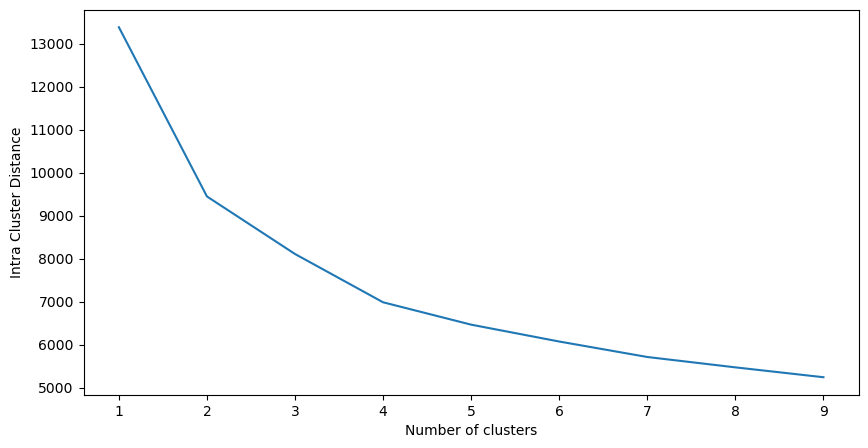

In [279]:
plt.close()
plt.rcParams['figure.figsize']=[10,5]
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of clusters")
plt.ylabel("Intra Cluster Distance")

plt.show()

In [294]:
model = KMeans(n_clusters=3, max_iter=100).fit(df_klasterovanje)
centroids = model.cluster_centers_
cluster_labels = model.predict(df_klasterovanje)

centroids

array([[1.59746589, 0.52826511, 0.15204678, 0.19883041, 0.04873294,
        0.3245614 , 0.08966862, 0.10623782, 0.80409357, 2.50974659],
       [1.24397413, 0.55496767, 0.17166373, 0.19517931, 0.04174015,
        0.31510876, 0.3521458 , 0.07583774, 0.57201646, 0.47383892],
       [0.22834008, 0.53603239, 0.16761134, 0.17004049, 0.02672065,
        0.43157895, 0.76275304, 0.08582996, 0.151417  , 2.28259109]])

In [295]:
df_klasterovanje.shape

(3962, 10)

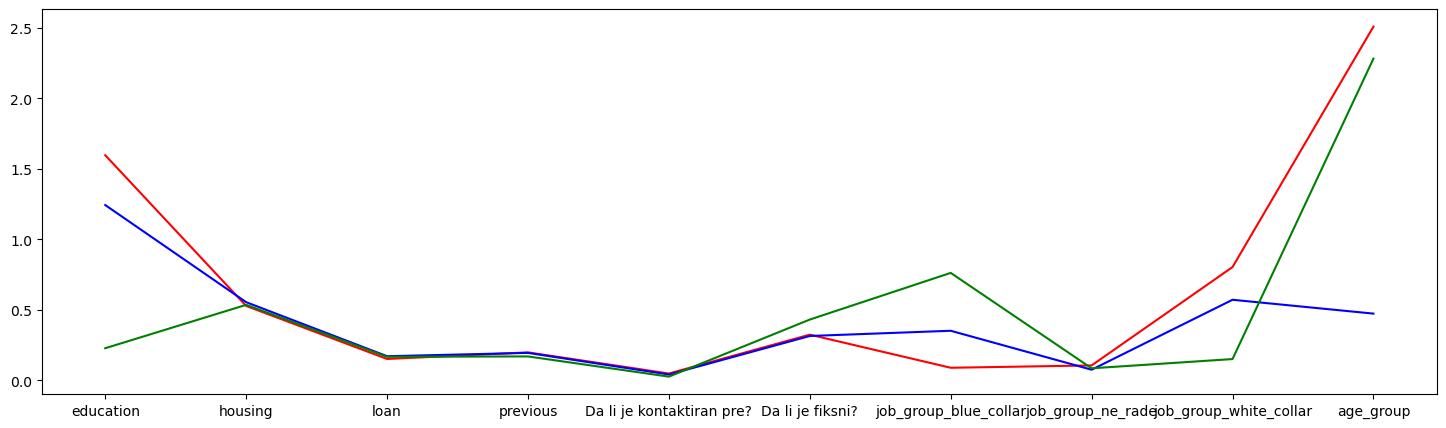

In [296]:
plt.rcParams['figure.figsize']=[18,5]
plt.plot(centroids[0,:], c = 'r')
plt.plot(centroids[1,:], c = 'b')
plt.plot(centroids[2,:], c = 'g')


plt.xticks(list(range(10)), df_klasterovanje.columns)
plt.show()

Prvi klaster, prikazan crvenom linijom obuhvata visokoobrazovane, white collar starije ljude. Oni rade na visokim pozicijama, imaju puno godina iskustva i uspesni su u svome poslu. Banka ih nece. Pretpostavka je da imaju visoke prihode.
Drugi klasterm oznacen plavom bojom mahom cine srednje i visokoobrazovani ljudi se bave slabije placenim posloviam od crvenih i znatno su mladji. Ocena je da su kod njih manje sanse za depozitom.
Zeleni su skromnog obrazovanja, rade u fabrikama, srednjeg zivotnog doba

In [297]:
from sklearn.metrics import silhouette_score

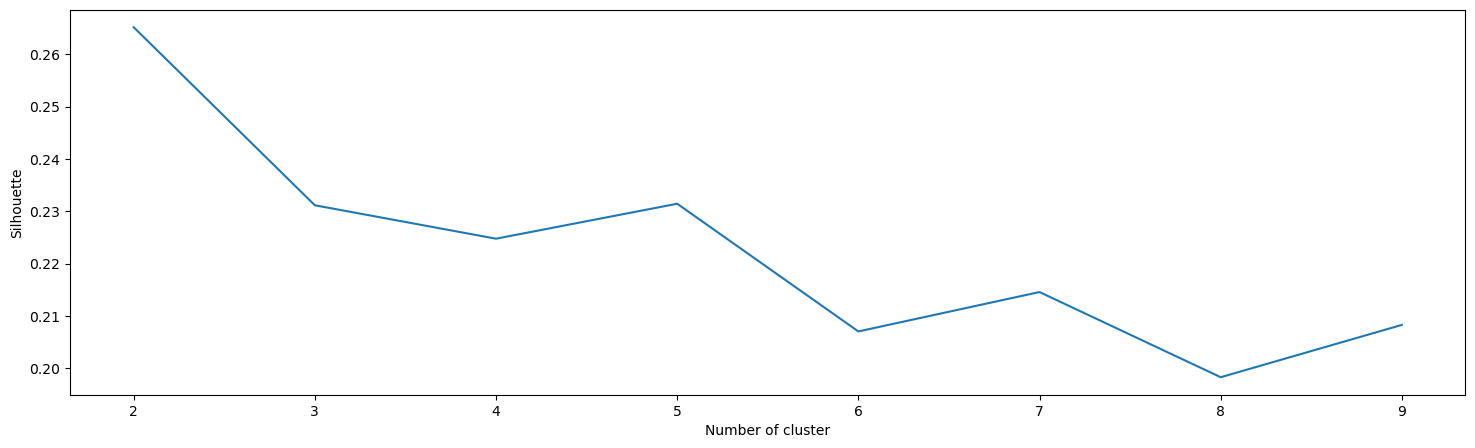

In [298]:
sse = {}
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, max_iter=100).fit(df_klasterovanje)
    cluster_labels = kmeans.fit_predict(df_klasterovanje)
    sse[k] = silhouette_score(df_klasterovanje, cluster_labels)

plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette")
plt.show()

#

Prema Siluet skoru, optimalan broj klastera je 3

In [322]:
kmeans = KMeans(n_clusters=3, random_state=42)
df_final3 = df_final2 
df_final3['klaster'] = kmeans.fit_predict(df_klasterovanje)

In [324]:
df_final3['klaster'].unique()
df_final3.head()

,education,housing,loan,previous,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,Da li je kontaktiran pre?,Da li je fiksni?,job_group_blue_collar,job_group_ne_rade,job_group_white_collar,age_group,klaster
0,0,1,0,0.0,0.269680,0.192469,0.153741,0.512287,0,0,1,0,0,0,0
1,1,0,0,0.0,0.698753,0.602510,0.956916,0.859735,0,1,0,0,1,2,2
2,1,1,0,0.0,0.882307,0.376569,0.981179,1.000000,0,1,0,0,1,0,0
4,2,1,0,0.0,0.389322,0.368201,0.806349,0.877883,0,0,0,0,1,3,2
5,2,0,0,2.0,0.778644,0.556485,0.056463,0.000000,0,0,0,0,1,1,0


In [325]:
df_subset1 = df_final3.loc[df_final3['klaster']==0]
df_subset1

,education,housing,loan,previous,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,Da li je kontaktiran pre?,Da li je fiksni?,job_group_blue_collar,job_group_ne_rade,job_group_white_collar,age_group,klaster
0,0,1,0,0.0,0.269680,0.192469,0.153741,0.512287,0,0,1,0,0,0,0
2,1,1,0,0.0,0.882307,0.376569,0.981179,1.000000,0,1,0,0,1,0,0
5,2,0,0,2.0,0.778644,0.556485,0.056463,0.000000,0,0,0,0,1,1,0
6,2,1,0,0.0,0.778644,0.556485,0.055329,0.000000,0,0,0,0,1,1,0
8,1,0,0,1.0,0.389322,0.368201,0.797732,0.877883,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4112,1,1,0,0.0,0.389322,0.368201,0.780272,0.877883,0,0,1,0,0,0,0
4113,2,1,0,0.0,0.389322,0.368201,0.780272,0.877883,0,0,0,0,1,0,0
4114,0,1,1,0.0,0.669135,0.338912,0.980272,1.000000,0,0,0,0,1,0,0
4116,1,0,0,1.0,0.269680,0.192469,0.163039,0.512287,0,0,0,1,0,0,0


In [326]:
df_subset2 = df_final3.loc[df_final3['klaster']==1]

In [327]:
df_subset2

,education,housing,loan,previous,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,Da li je kontaktiran pre?,Da li je fiksni?,job_group_blue_collar,job_group_ne_rade,job_group_white_collar,age_group,klaster
9,0,0,0,0.0,0.698753,0.602510,0.956916,0.859735,0,1,1,0,0,1,1
13,0,1,0,0.0,0.882307,0.376569,0.980272,1.000000,0,1,1,0,0,3,1
19,0,0,1,0.0,0.669135,0.338912,0.980952,1.000000,0,0,1,0,0,3,1
20,0,1,0,0.0,0.669135,0.338912,0.981179,1.000000,0,0,0,0,1,3,1
21,1,0,0,2.0,0.455183,0.669456,0.000907,0.170510,1,0,1,0,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4094,0,1,0,1.0,0.174591,0.866109,0.019048,0.203781,1,0,1,0,0,3,1
4097,0,0,0,0.0,0.484412,0.615063,0.981406,1.000000,0,0,1,0,0,2,1
4104,1,1,0,0.0,0.484412,0.615063,0.982993,1.000000,0,0,1,0,0,2,1
4105,0,1,0,0.0,0.669135,0.338912,0.980952,1.000000,0,1,1,0,0,3,1


In [328]:
df_subset3 = df_final3.loc[df_final3['klaster']==2]
df_subset3

,education,housing,loan,previous,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,Da li je kontaktiran pre?,Da li je fiksni?,job_group_blue_collar,job_group_ne_rade,job_group_white_collar,age_group,klaster
1,1,0,0,0.0,0.698753,0.602510,0.956916,0.859735,0,1,0,0,1,2,2
4,2,1,0,0.0,0.389322,0.368201,0.806349,0.877883,0,0,0,0,1,3,2
7,2,1,0,0.0,0.389322,0.368201,0.806349,0.877883,0,0,0,0,1,2,2
16,2,0,0,0.0,0.669135,0.338912,0.980045,1.000000,0,0,0,0,1,2,2
17,2,1,0,0.0,0.669135,0.338912,0.981179,1.000000,0,1,0,0,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4100,1,0,0,0.0,0.340608,0.154812,0.174603,0.512287,0,0,0,0,1,2,2
4103,1,0,0,0.0,0.698753,0.602510,0.957370,0.859735,0,1,0,0,1,2,2
4109,1,0,0,0.0,0.089634,1.000000,0.023810,0.203781,0,0,0,1,0,3,2
4115,1,1,0,0.0,0.669135,0.338912,0.980499,1.000000,0,1,0,0,1,2,2


In [335]:
df_subset1=df_subset1.drop(columns='klaster')
df_subset2=df_subset2.drop(columns='klaster')
df_subset3=df_subset3.drop(columns='klaster')

In [330]:
y

0       0
1       0
2       0
4       0
5       0
       ..
4114    0
4115    0
4116    0
4117    0
4118    0
Name: y, Length: 3962, dtype: int64

In [336]:
y_subset1 = y.loc[df_subset1.index]
y_subset2 = y.loc[df_subset2.index]
y_subset3 = y.loc[df_subset3.index]
df_subset1

,education,housing,loan,previous,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,Da li je kontaktiran pre?,Da li je fiksni?,job_group_blue_collar,job_group_ne_rade,job_group_white_collar,age_group
0,0,1,0,0.0,0.269680,0.192469,0.153741,0.512287,0,0,1,0,0,0
2,1,1,0,0.0,0.882307,0.376569,0.981179,1.000000,0,1,0,0,1,0
5,2,0,0,2.0,0.778644,0.556485,0.056463,0.000000,0,0,0,0,1,1
6,2,1,0,0.0,0.778644,0.556485,0.055329,0.000000,0,0,0,0,1,1
8,1,0,0,1.0,0.389322,0.368201,0.797732,0.877883,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4112,1,1,0,0.0,0.389322,0.368201,0.780272,0.877883,0,0,1,0,0,0
4113,2,1,0,0.0,0.389322,0.368201,0.780272,0.877883,0,0,0,0,1,0
4114,0,1,1,0.0,0.669135,0.338912,0.980272,1.000000,0,0,0,0,1,0
4116,1,0,0,1.0,0.269680,0.192469,0.163039,0.512287,0,0,0,1,0,0


In [337]:
X_train, X_test, y_train, y_test = train_test_split(df_subset1, y_subset1, test_size = 0.3, random_state = 101)

logreg = LogisticRegression(random_state=101)


logreg.fit(X_train, y_train)

y_pred_train_lr = logreg.predict(X_train)


y_pred_test_lr = logreg.predict(X_test)


metrics = {
    'Tacnost': [accuracy_score(y_train, y_pred_train_lr), accuracy_score(y_test, y_pred_test_lr)],
    'Preciznost': [precision_score(y_train, y_pred_train_lr, average='weighted'), 
                  precision_score(y_test, y_pred_test_lr, average='weighted')],
    'Odziv': [recall_score(y_train, y_pred_train_lr, average='weighted'), 
               recall_score(y_test, y_pred_test_lr, average='weighted')],
    'F1 statistika': [f1_score(y_train, y_pred_train_lr, average='weighted'), 
                 f1_score(y_test, y_pred_test_lr, average='weighted')]
}

metrics_df1 = pd.DataFrame(metrics, index=['Training Set', 'Test Set'])

# Prikaz DataFrame-a sa metrikama
print(metrics_df1)

               Tacnost  Preciznost     Odziv  F1 statistika
Training Set  0.896639    0.876536  0.896639       0.869933
Test Set      0.898239    0.877900  0.898239       0.872883


In [338]:
X_train, X_test, y_train, y_test = train_test_split(df_subset2, y_subset2, test_size = 0.3, random_state = 101)

logreg = LogisticRegression(random_state=101)


logreg.fit(X_train, y_train)

y_pred_train_lr = logreg.predict(X_train)


y_pred_test_lr = logreg.predict(X_test)


metrics = {
    'Tacnost': [accuracy_score(y_train, y_pred_train_lr), accuracy_score(y_test, y_pred_test_lr)],
    'Preciznost': [precision_score(y_train, y_pred_train_lr, average='weighted'), 
                  precision_score(y_test, y_pred_test_lr, average='weighted')],
    'Odziv': [recall_score(y_train, y_pred_train_lr, average='weighted'), 
               recall_score(y_test, y_pred_test_lr, average='weighted')],
    'F1 statistika': [f1_score(y_train, y_pred_train_lr, average='weighted'), 
                 f1_score(y_test, y_pred_test_lr, average='weighted')]
}

metrics_df2 = pd.DataFrame(metrics, index=['Training Set', 'Test Set'])


print(metrics_df2)

               Tacnost  Preciznost     Odziv  F1 statistika
Training Set  0.913194    0.898155  0.913194       0.882114
Test Set      0.913747    0.898403  0.913747       0.886721


In [339]:
X_train, X_test, y_train, y_test = train_test_split(df_subset3, y_subset3, test_size = 0.3, random_state = 101)

logreg = LogisticRegression(random_state=101)


logreg.fit(X_train, y_train)

y_pred_train_lr = logreg.predict(X_train)


y_pred_test_lr = logreg.predict(X_test)


metrics = {
    'Tacnost': [accuracy_score(y_train, y_pred_train_lr), accuracy_score(y_test, y_pred_test_lr)],
    'Preciznost': [precision_score(y_train, y_pred_train_lr, average='weighted'), 
                  precision_score(y_test, y_pred_test_lr, average='weighted')],
    'Odziv': [recall_score(y_train, y_pred_train_lr, average='weighted'), 
               recall_score(y_test, y_pred_test_lr, average='weighted')],
    'F1 statistika': [f1_score(y_train, y_pred_train_lr, average='weighted'), 
                 f1_score(y_test, y_pred_test_lr, average='weighted')]
}

metrics_df3 = pd.DataFrame(metrics, index=['Training Set', 'Test Set'])


print(metrics_df3)

               Tacnost  Preciznost     Odziv  F1 statistika
Training Set  0.889972    0.873349  0.889972       0.866481
Test Set      0.896104    0.880387  0.896104       0.876973


k=1 84.37 (+/- 2.89)
k=2 88.57 (+/- 2.03)
k=3 88.15 (+/- 2.11)
k=4 88.91 (+/- 1.59)
k=5 88.49 (+/- 1.25)
k=6 88.91 (+/- 1.59)
k=7 88.99 (+/- 1.90)
k=8 89.33 (+/- 1.88)
k=9 89.92 (+/- 1.99)
k=10 89.58 (+/- 1.56)
k=11 89.58 (+/- 1.65)
k=12 89.41 (+/- 1.81)
k=13 89.58 (+/- 1.85)
k=14 89.58 (+/- 1.56)
k=15 89.66 (+/- 1.84)
k=16 89.58 (+/- 1.81)
k=17 89.50 (+/- 1.93)
k=18 89.41 (+/- 1.60)
k=19 89.33 (+/- 1.88)
k=20 89.16 (+/- 1.74)
k=21 89.41 (+/- 1.89)
k=22 89.33 (+/- 1.80)
k=23 89.41 (+/- 1.89)
k=24 89.41 (+/- 1.73)
k=25 89.41 (+/- 2.03)
Optimalan broj suseda je 8 sa 89.9%


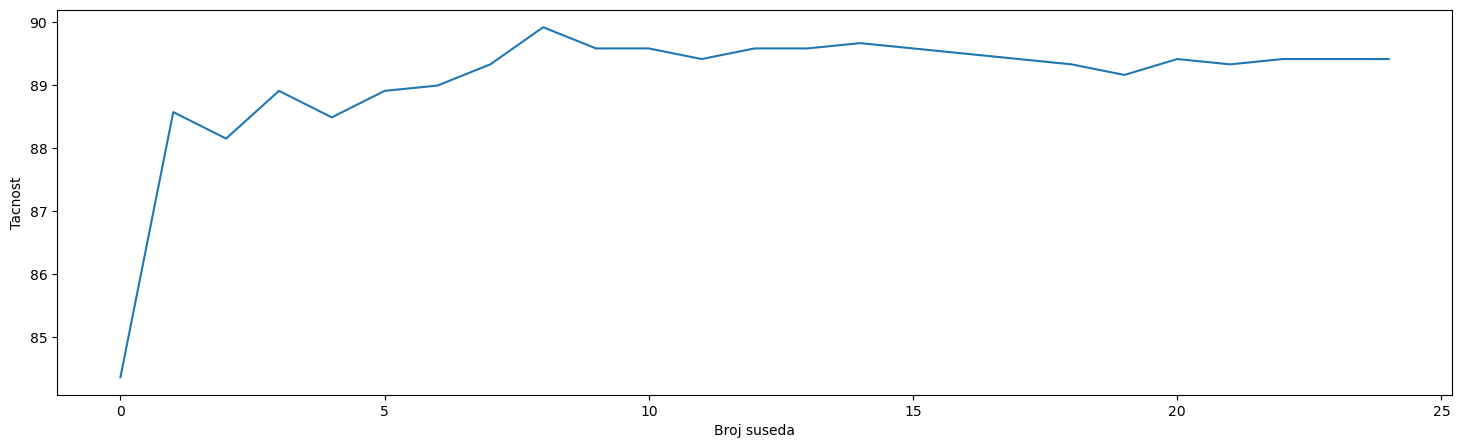

In [340]:
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier

X_trainK, X_testK, y_trainK, y_testK = train_test_split(df_subset1, y_subset1, test_size = 0.3)


neighbors = np.arange(0,25)


cv_scores = []


for k in neighbors:
    k_value = k+1
    knn = KNeighborsClassifier(n_neighbors = k_value, weights='uniform', p=2, metric='euclidean')
    kfold = model_selection.KFold(n_splits=10)
    scores = model_selection.cross_val_score(knn, X_trainK, y_trainK, cv=kfold, scoring='accuracy')
    cv_scores.append(scores.mean()*100)
    print("k=%d %0.2f (+/- %0.2f)" % (k_value, scores.mean()*100, scores.std()*100))

optimal_k = neighbors[cv_scores.index(max(cv_scores))]
print ("Optimalan broj suseda je %d sa %0.1f%%" % (optimal_k, cv_scores[optimal_k]))

plt.plot(neighbors, cv_scores)
plt.xlabel('Broj suseda')
plt.ylabel('Tacnost')
plt.show()

k=1 86.10 (+/- 5.77)
k=2 89.92 (+/- 4.39)
k=3 90.26 (+/- 5.25)
k=4 91.30 (+/- 4.49)
k=5 91.19 (+/- 4.73)
k=6 90.84 (+/- 4.31)
k=7 91.30 (+/- 4.34)
k=8 90.96 (+/- 3.97)
k=9 90.96 (+/- 4.20)
k=10 90.50 (+/- 4.29)
k=11 90.38 (+/- 4.21)
k=12 90.61 (+/- 4.41)
k=13 90.61 (+/- 4.41)
k=14 90.61 (+/- 4.41)
k=15 90.61 (+/- 4.41)
k=16 90.50 (+/- 4.63)
k=17 90.38 (+/- 4.52)
k=18 90.50 (+/- 4.63)
k=19 90.50 (+/- 4.63)
k=20 90.38 (+/- 4.60)
k=21 90.61 (+/- 4.41)
k=22 90.38 (+/- 4.55)
k=23 90.50 (+/- 4.63)
k=24 90.38 (+/- 4.55)
k=25 90.50 (+/- 4.63)
Optimalan broj suseda je 3 sa 91.3%


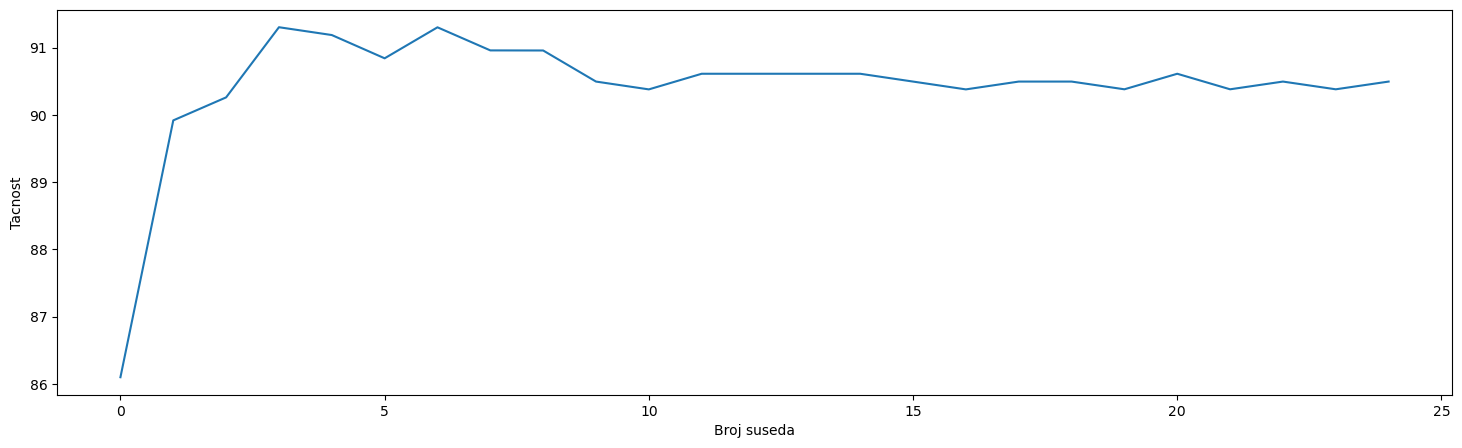

In [341]:
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier

X_trainK, X_testK, y_trainK, y_testK = train_test_split(df_subset2, y_subset2, test_size = 0.3)


neighbors = np.arange(0,25)


cv_scores = []


for k in neighbors:
    k_value = k+1
    knn = KNeighborsClassifier(n_neighbors = k_value, weights='uniform', p=2, metric='euclidean')
    kfold = model_selection.KFold(n_splits=10)
    scores = model_selection.cross_val_score(knn, X_trainK, y_trainK, cv=kfold, scoring='accuracy')
    cv_scores.append(scores.mean()*100)
    print("k=%d %0.2f (+/- %0.2f)" % (k_value, scores.mean()*100, scores.std()*100))

optimal_k = neighbors[cv_scores.index(max(cv_scores))]
print ("Optimalan broj suseda je %d sa %0.1f%%" % (optimal_k, cv_scores[optimal_k]))

plt.plot(neighbors, cv_scores)
plt.xlabel('Broj suseda')
plt.ylabel('Tacnost')
plt.show()

k=1 83.99 (+/- 3.46)
k=2 85.38 (+/- 3.48)
k=3 84.69 (+/- 3.50)
k=4 85.80 (+/- 2.95)
k=5 86.22 (+/- 3.41)
k=6 86.21 (+/- 3.59)
k=7 86.35 (+/- 4.03)
k=8 86.63 (+/- 3.84)
k=9 86.35 (+/- 4.18)
k=10 86.35 (+/- 3.93)
k=11 86.07 (+/- 3.80)
k=12 86.49 (+/- 3.80)
k=13 86.35 (+/- 4.14)
k=14 86.63 (+/- 3.80)
k=15 86.49 (+/- 4.15)
k=16 86.77 (+/- 3.58)
k=17 86.63 (+/- 4.19)
k=18 86.77 (+/- 3.53)
k=19 86.91 (+/- 3.94)
k=20 86.35 (+/- 3.77)
k=21 86.35 (+/- 4.16)
k=22 86.63 (+/- 4.09)
k=23 86.77 (+/- 3.99)
k=24 86.35 (+/- 3.87)
k=25 86.63 (+/- 3.89)
Optimalan broj suseda je 18 sa 86.9%


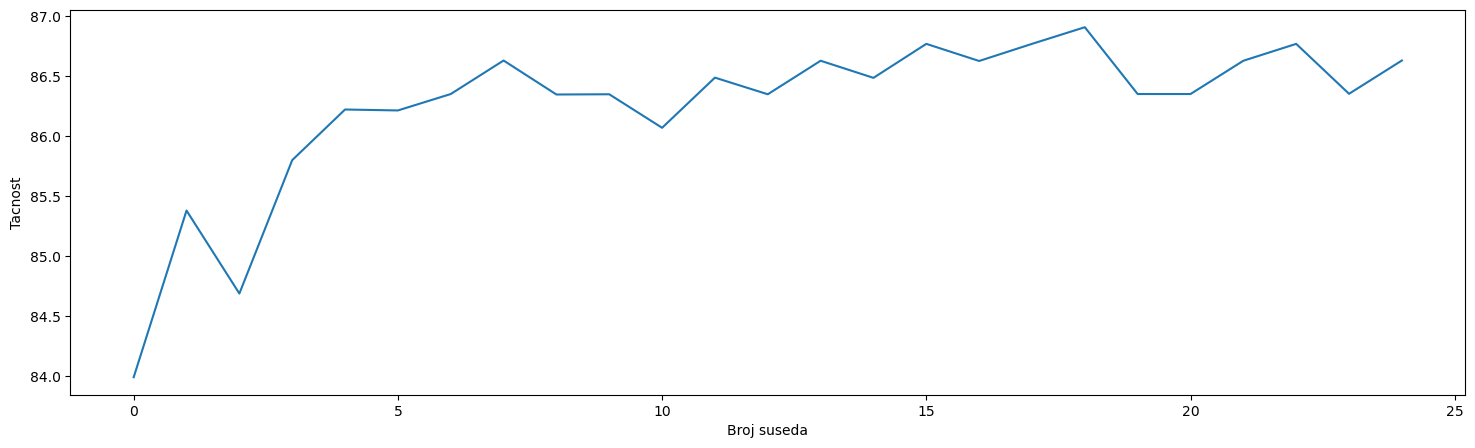

In [342]:
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier

X_trainK, X_testK, y_trainK, y_testK = train_test_split(df_subset3, y_subset3, test_size = 0.3)


neighbors = np.arange(0,25)


cv_scores = []


for k in neighbors:
    k_value = k+1
    knn = KNeighborsClassifier(n_neighbors = k_value, weights='uniform', p=2, metric='euclidean')
    kfold = model_selection.KFold(n_splits=10)
    scores = model_selection.cross_val_score(knn, X_trainK, y_trainK, cv=kfold, scoring='accuracy')
    cv_scores.append(scores.mean()*100)
    print("k=%d %0.2f (+/- %0.2f)" % (k_value, scores.mean()*100, scores.std()*100))

optimal_k = neighbors[cv_scores.index(max(cv_scores))]
print ("Optimalan broj suseda je %d sa %0.1f%%" % (optimal_k, cv_scores[optimal_k]))

plt.plot(neighbors, cv_scores)
plt.xlabel('Broj suseda')
plt.ylabel('Tacnost')
plt.show()